# Assignment

1. Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.
2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?
3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [7]:
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"


engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

heartdisease_df = pd.read_sql_query("select * from heartdisease", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()


# The dataset needs some preprocessing.
# So, apply the following code before working with the dataset:

# Define the features and the outcome
X = heartdisease_df.iloc[1:, :13]
y = heartdisease_df.iloc[1:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace="?", value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

## 1. Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.

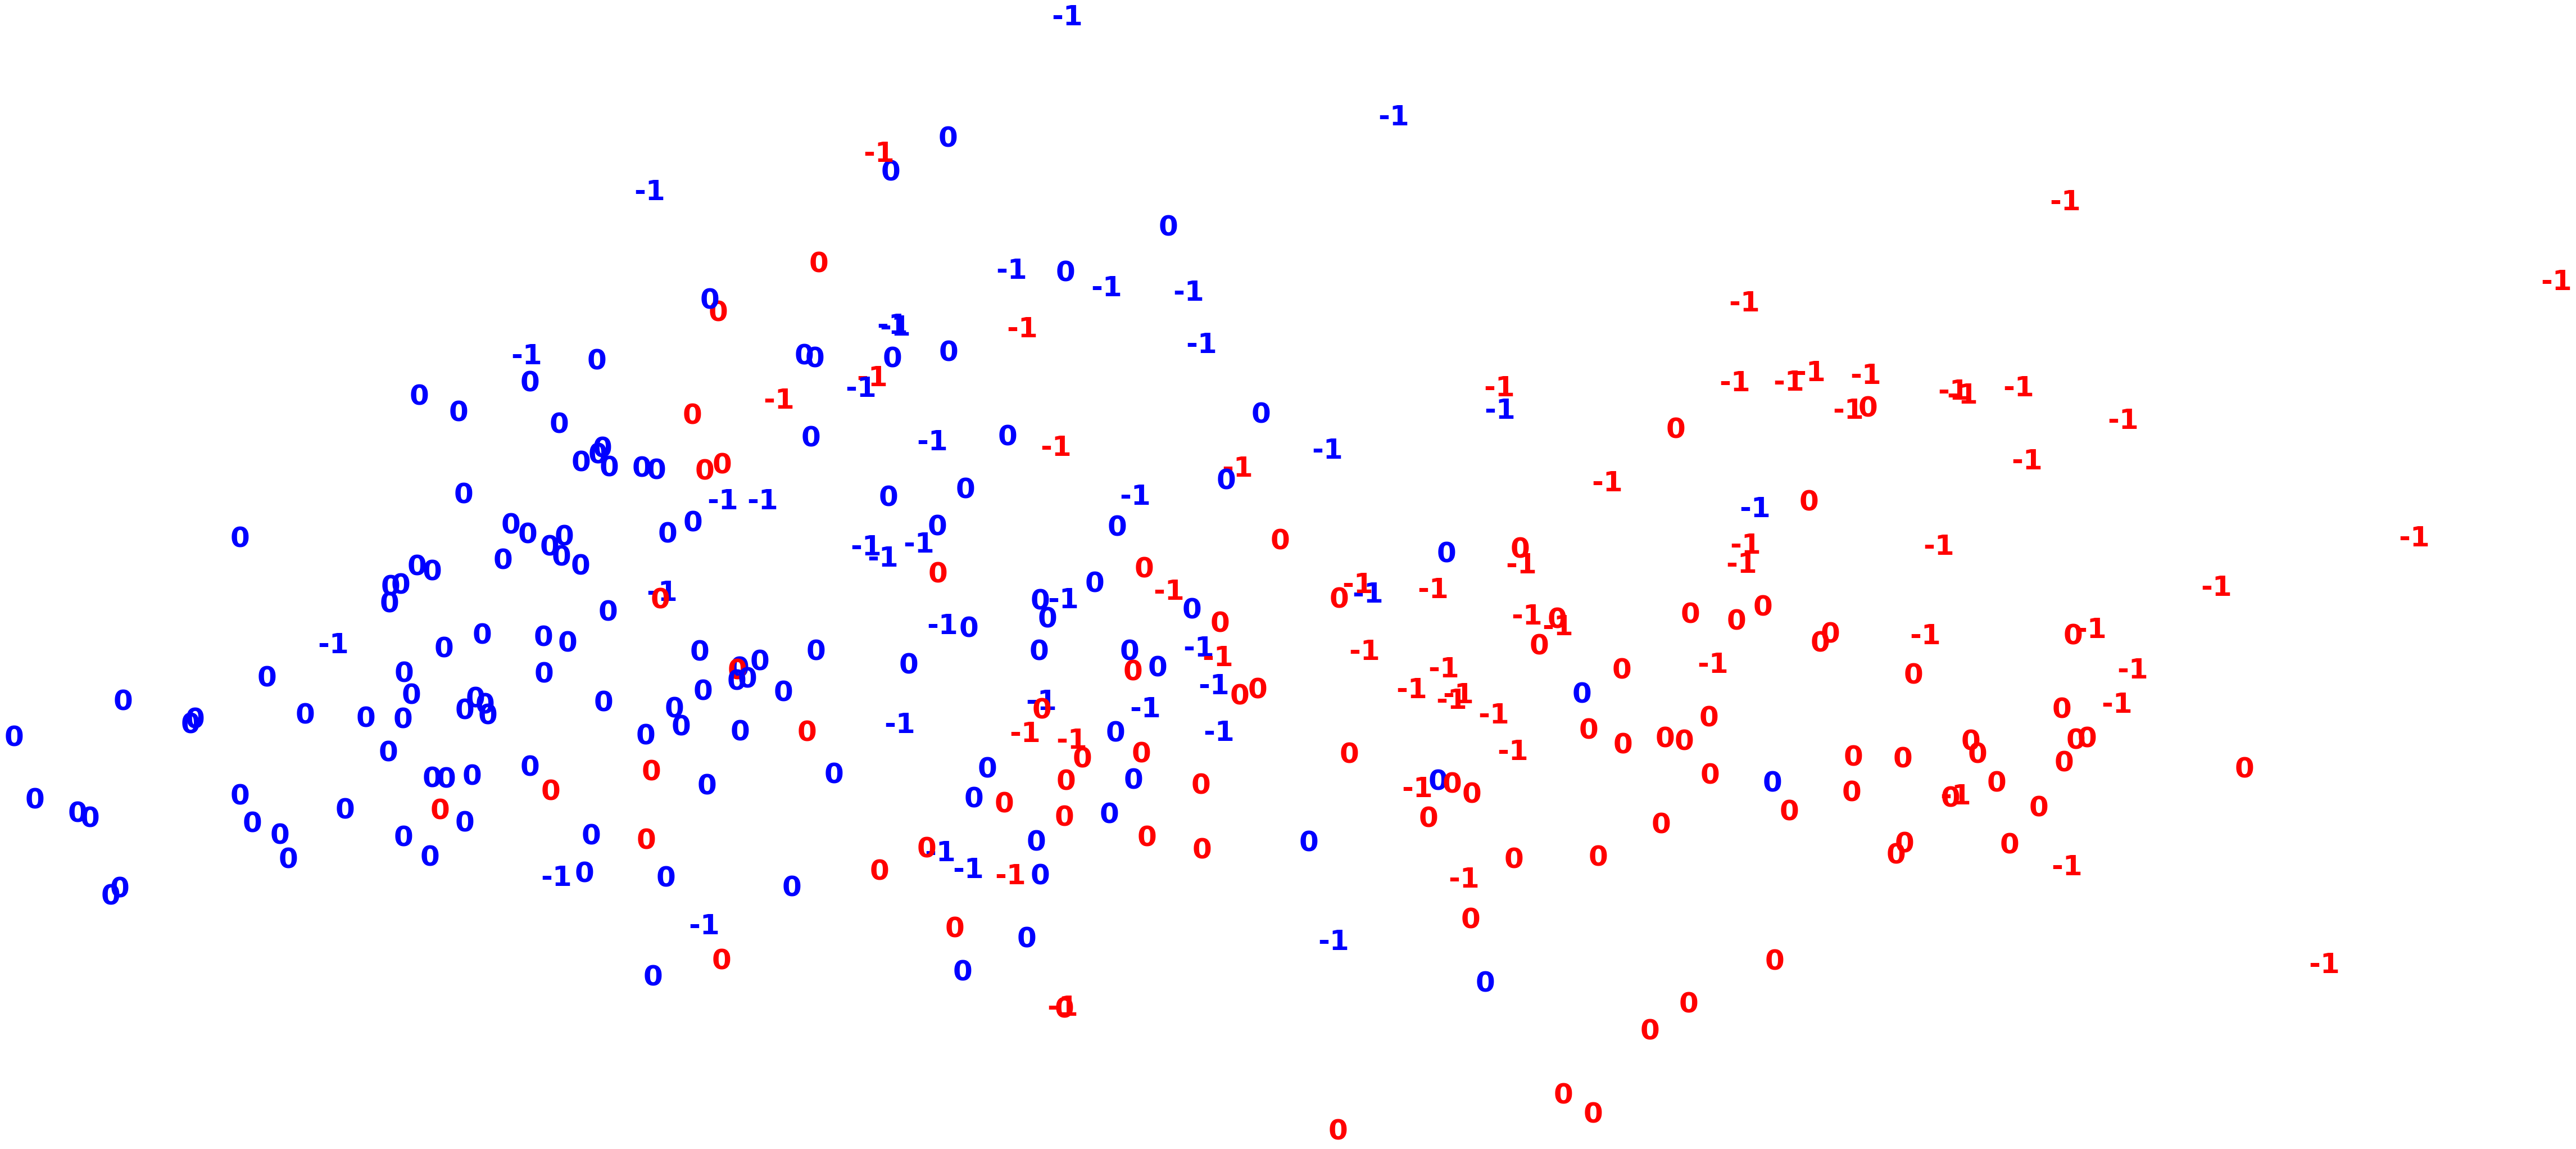

<IPython.core.display.Javascript object>

In [32]:
dbscan_cluster = DBSCAN(eps=3, min_samples=20, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10, 5))
colours = "rbg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks([])
plt.yticks([])
plt.axis("off")
plt.show()

## 2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

1


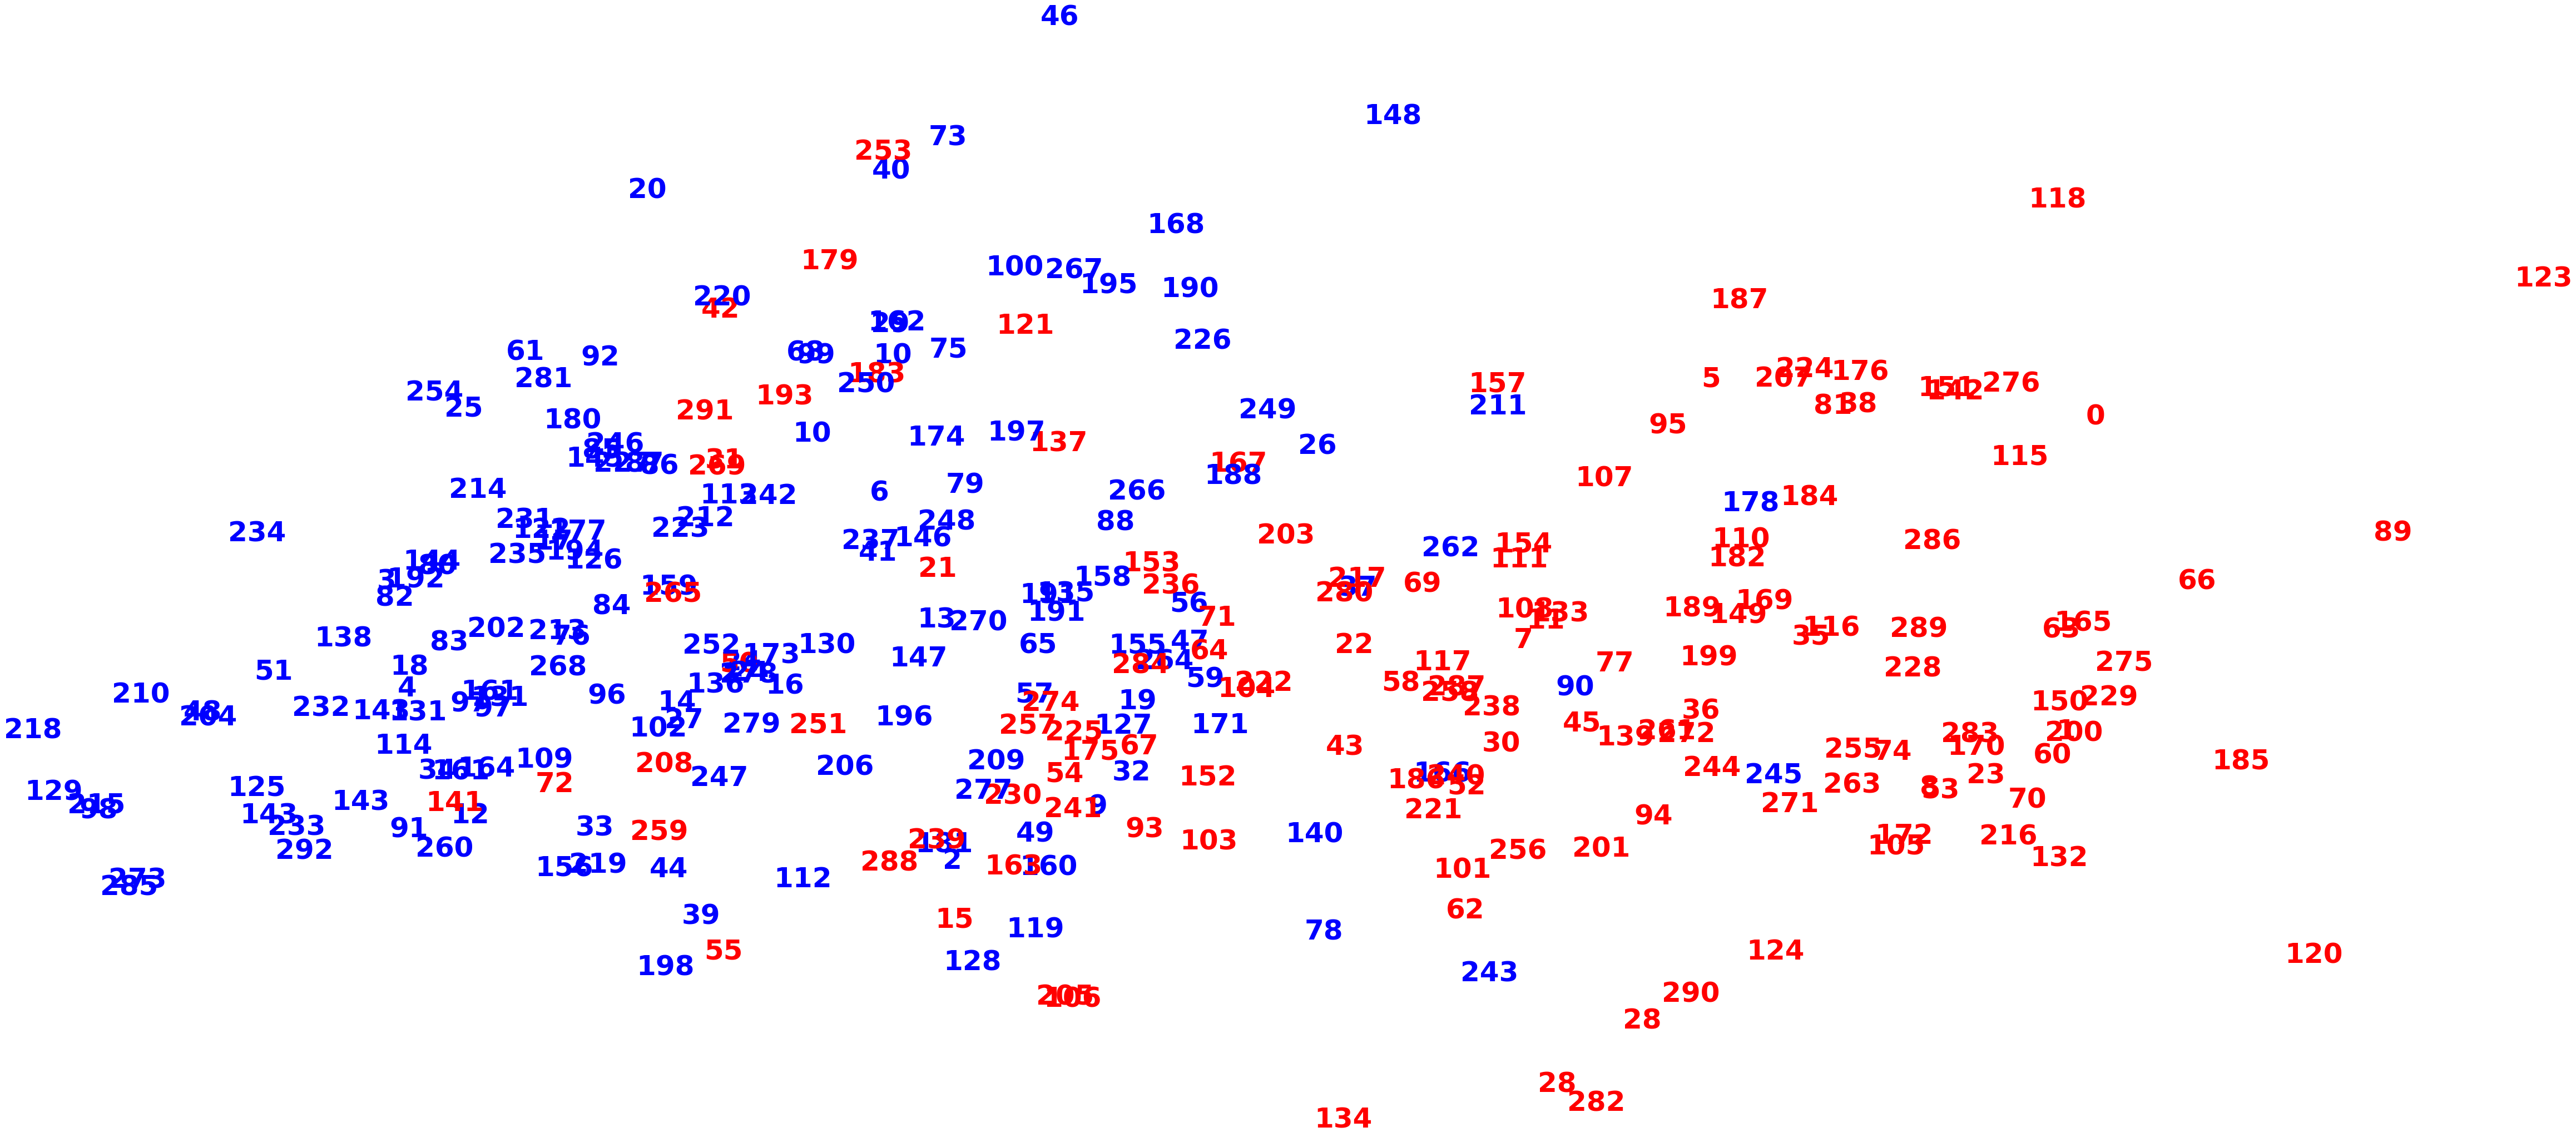

2


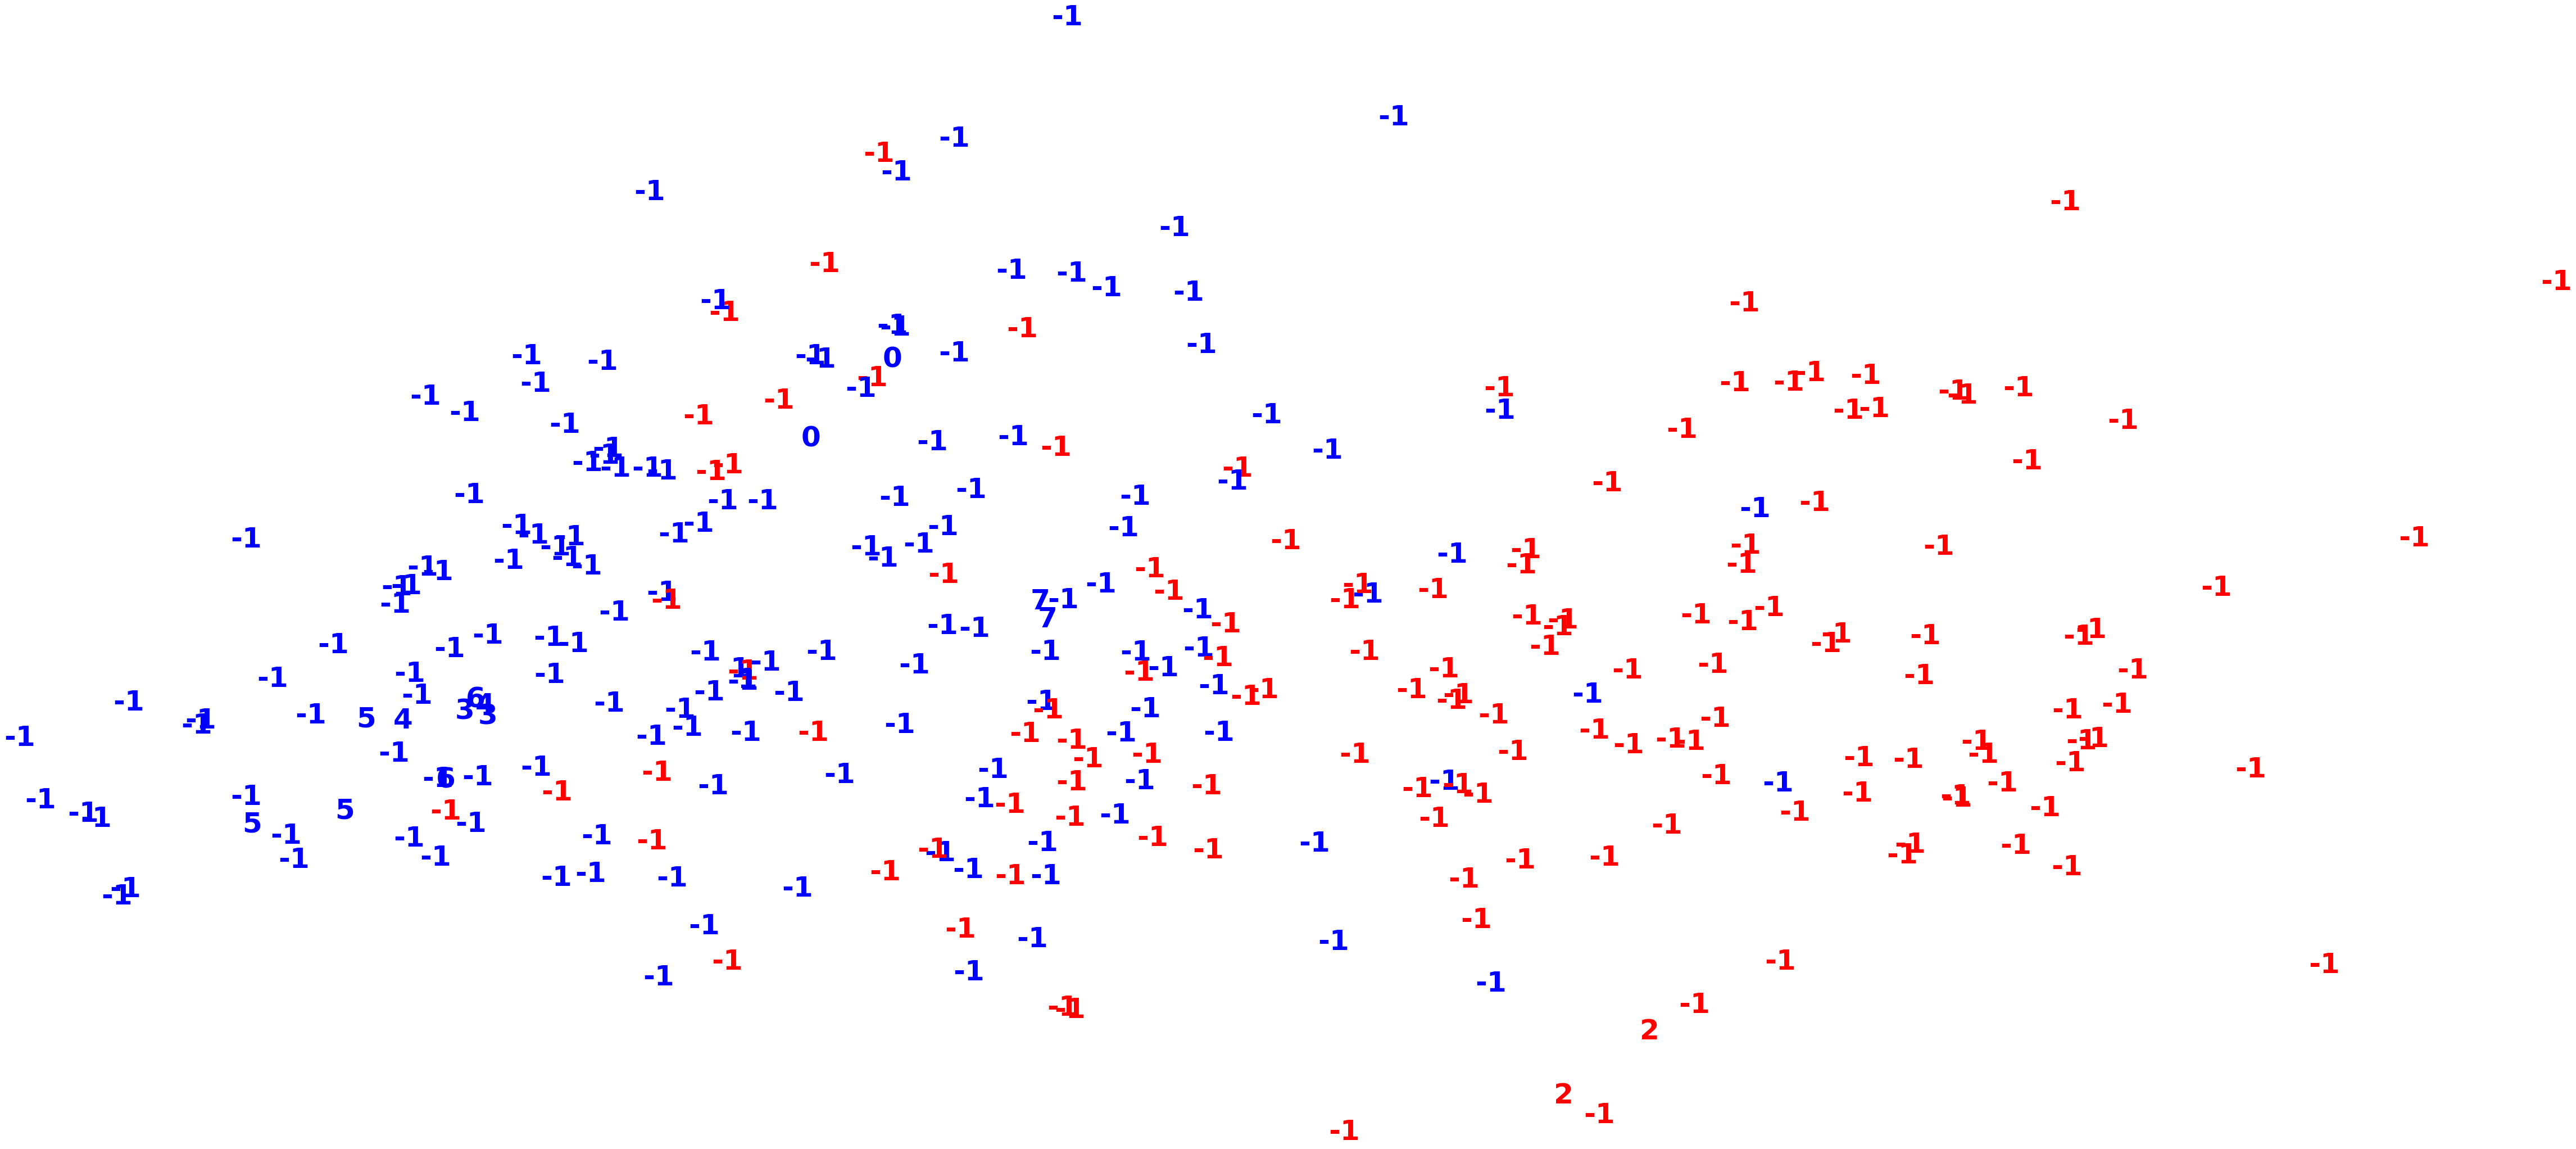

3


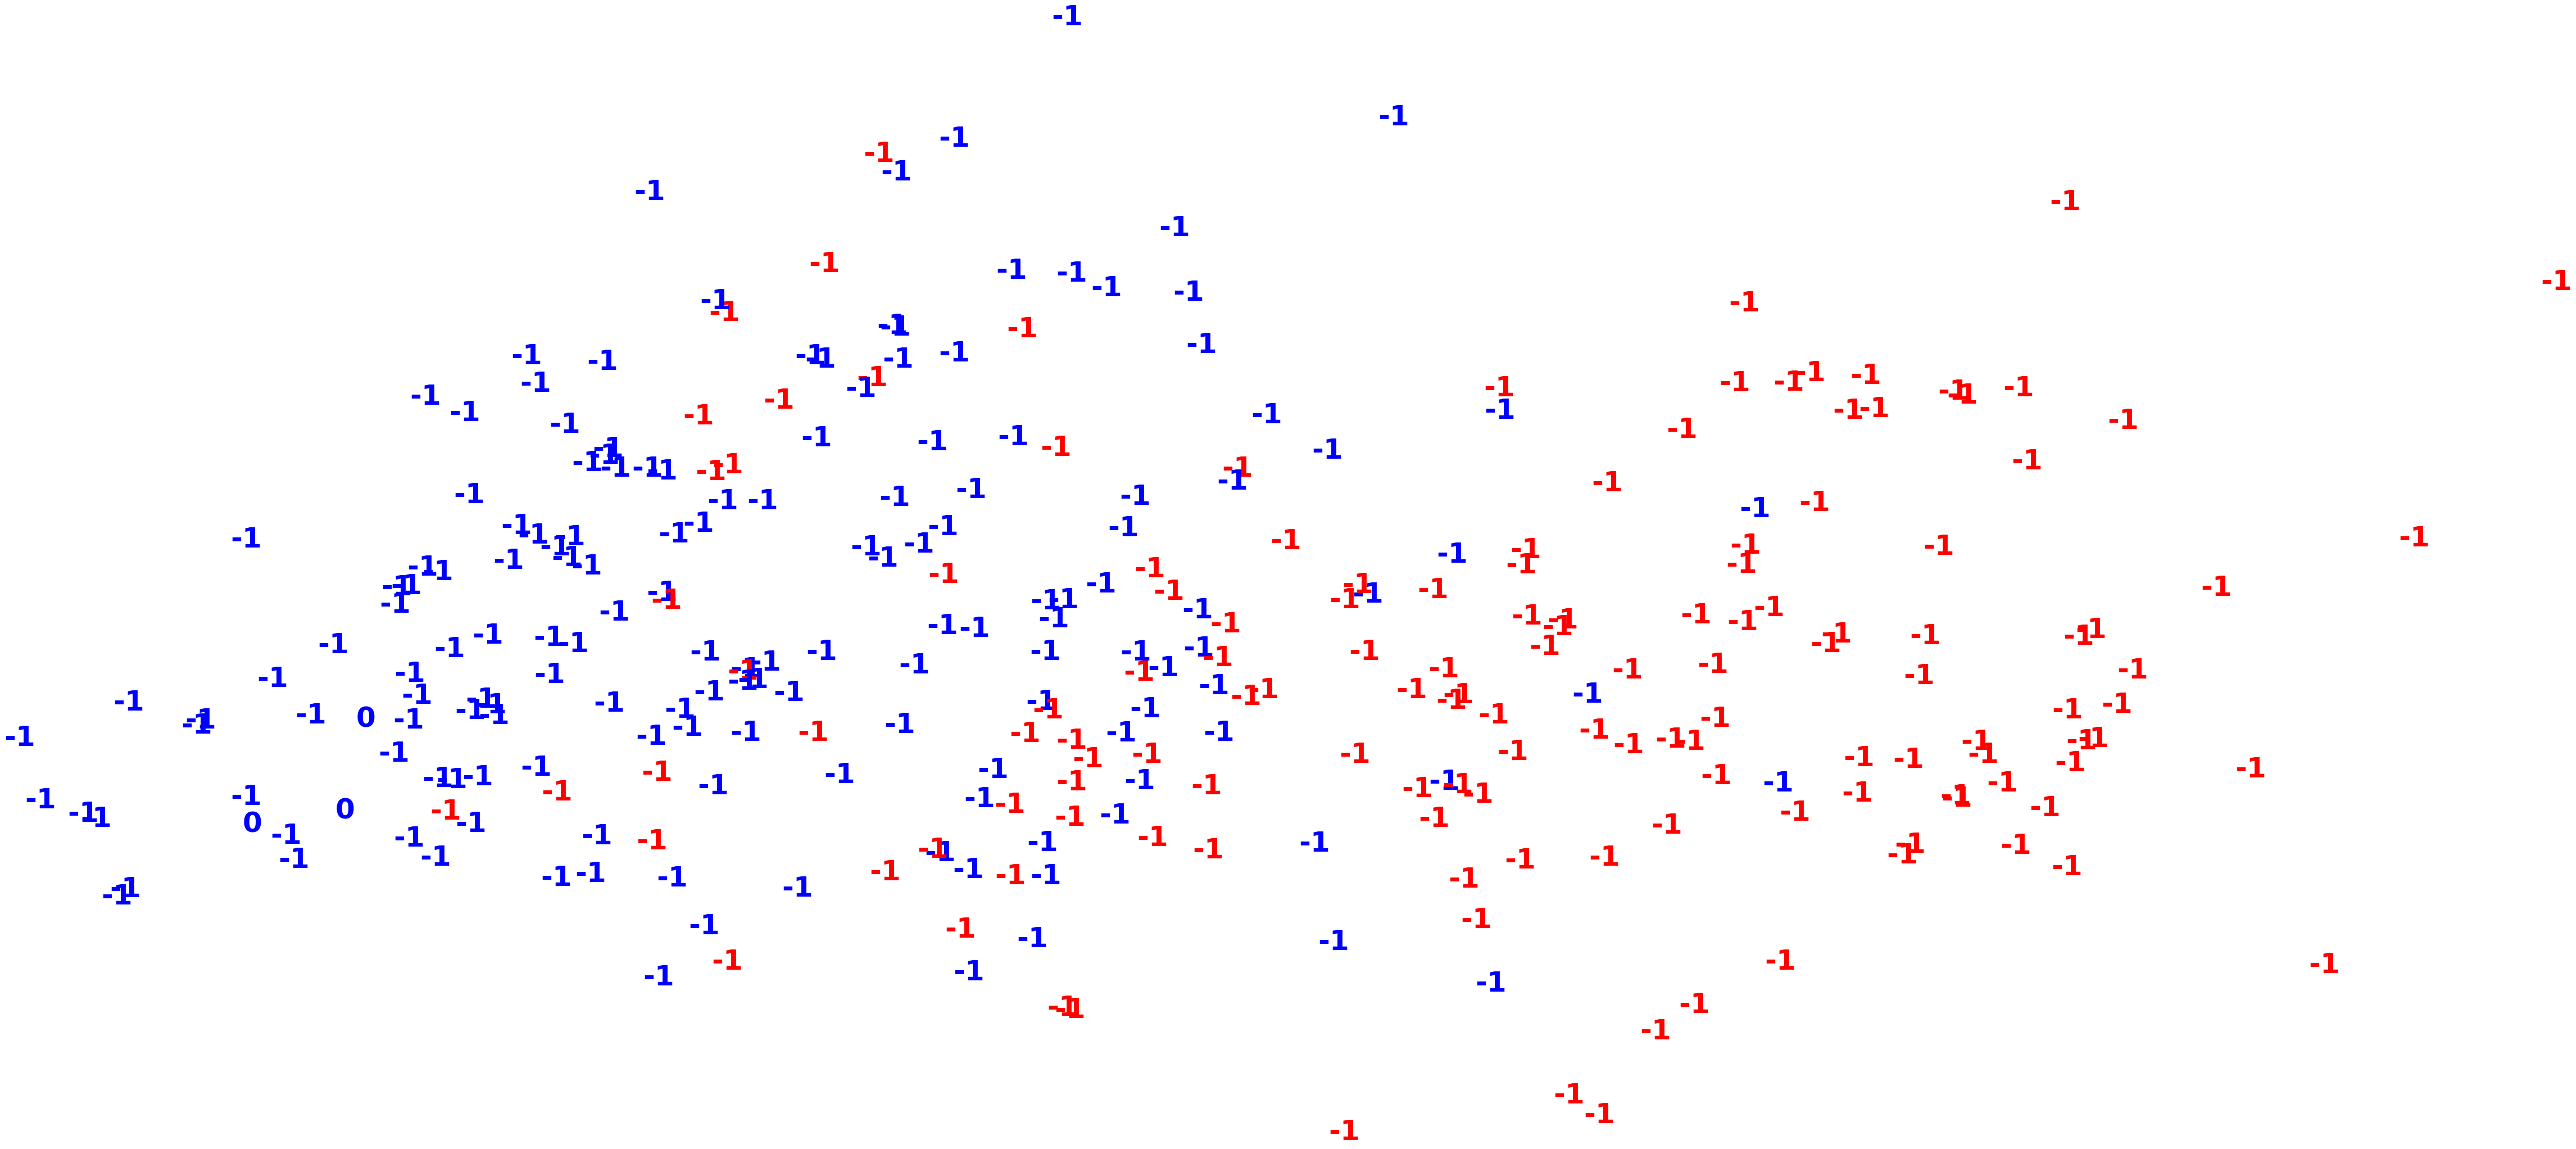

4


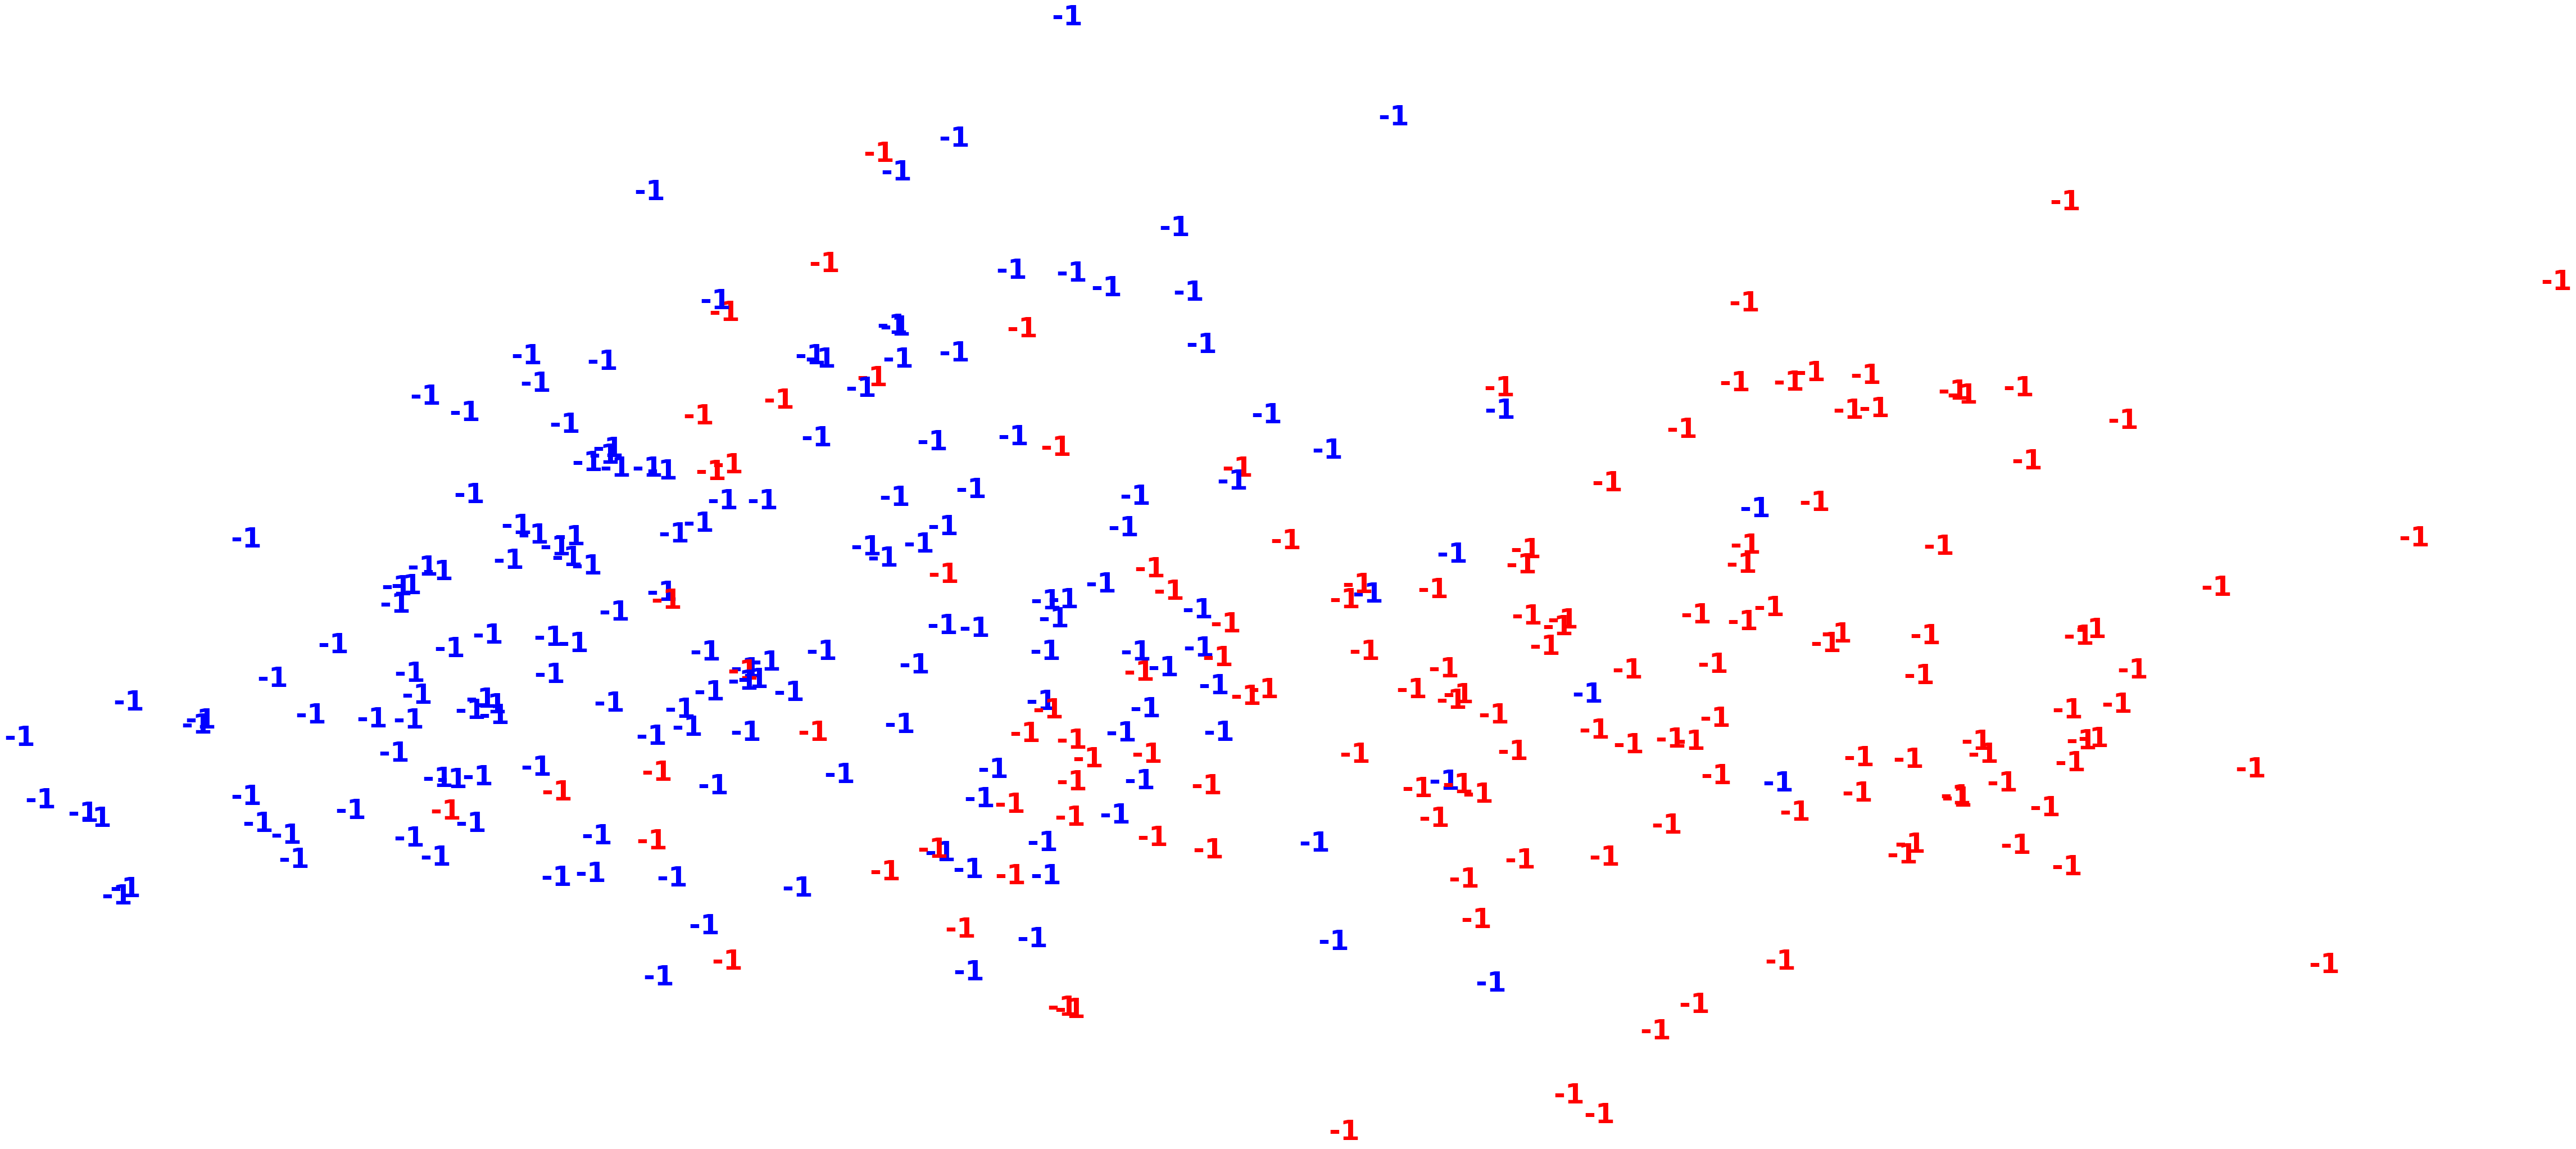

5


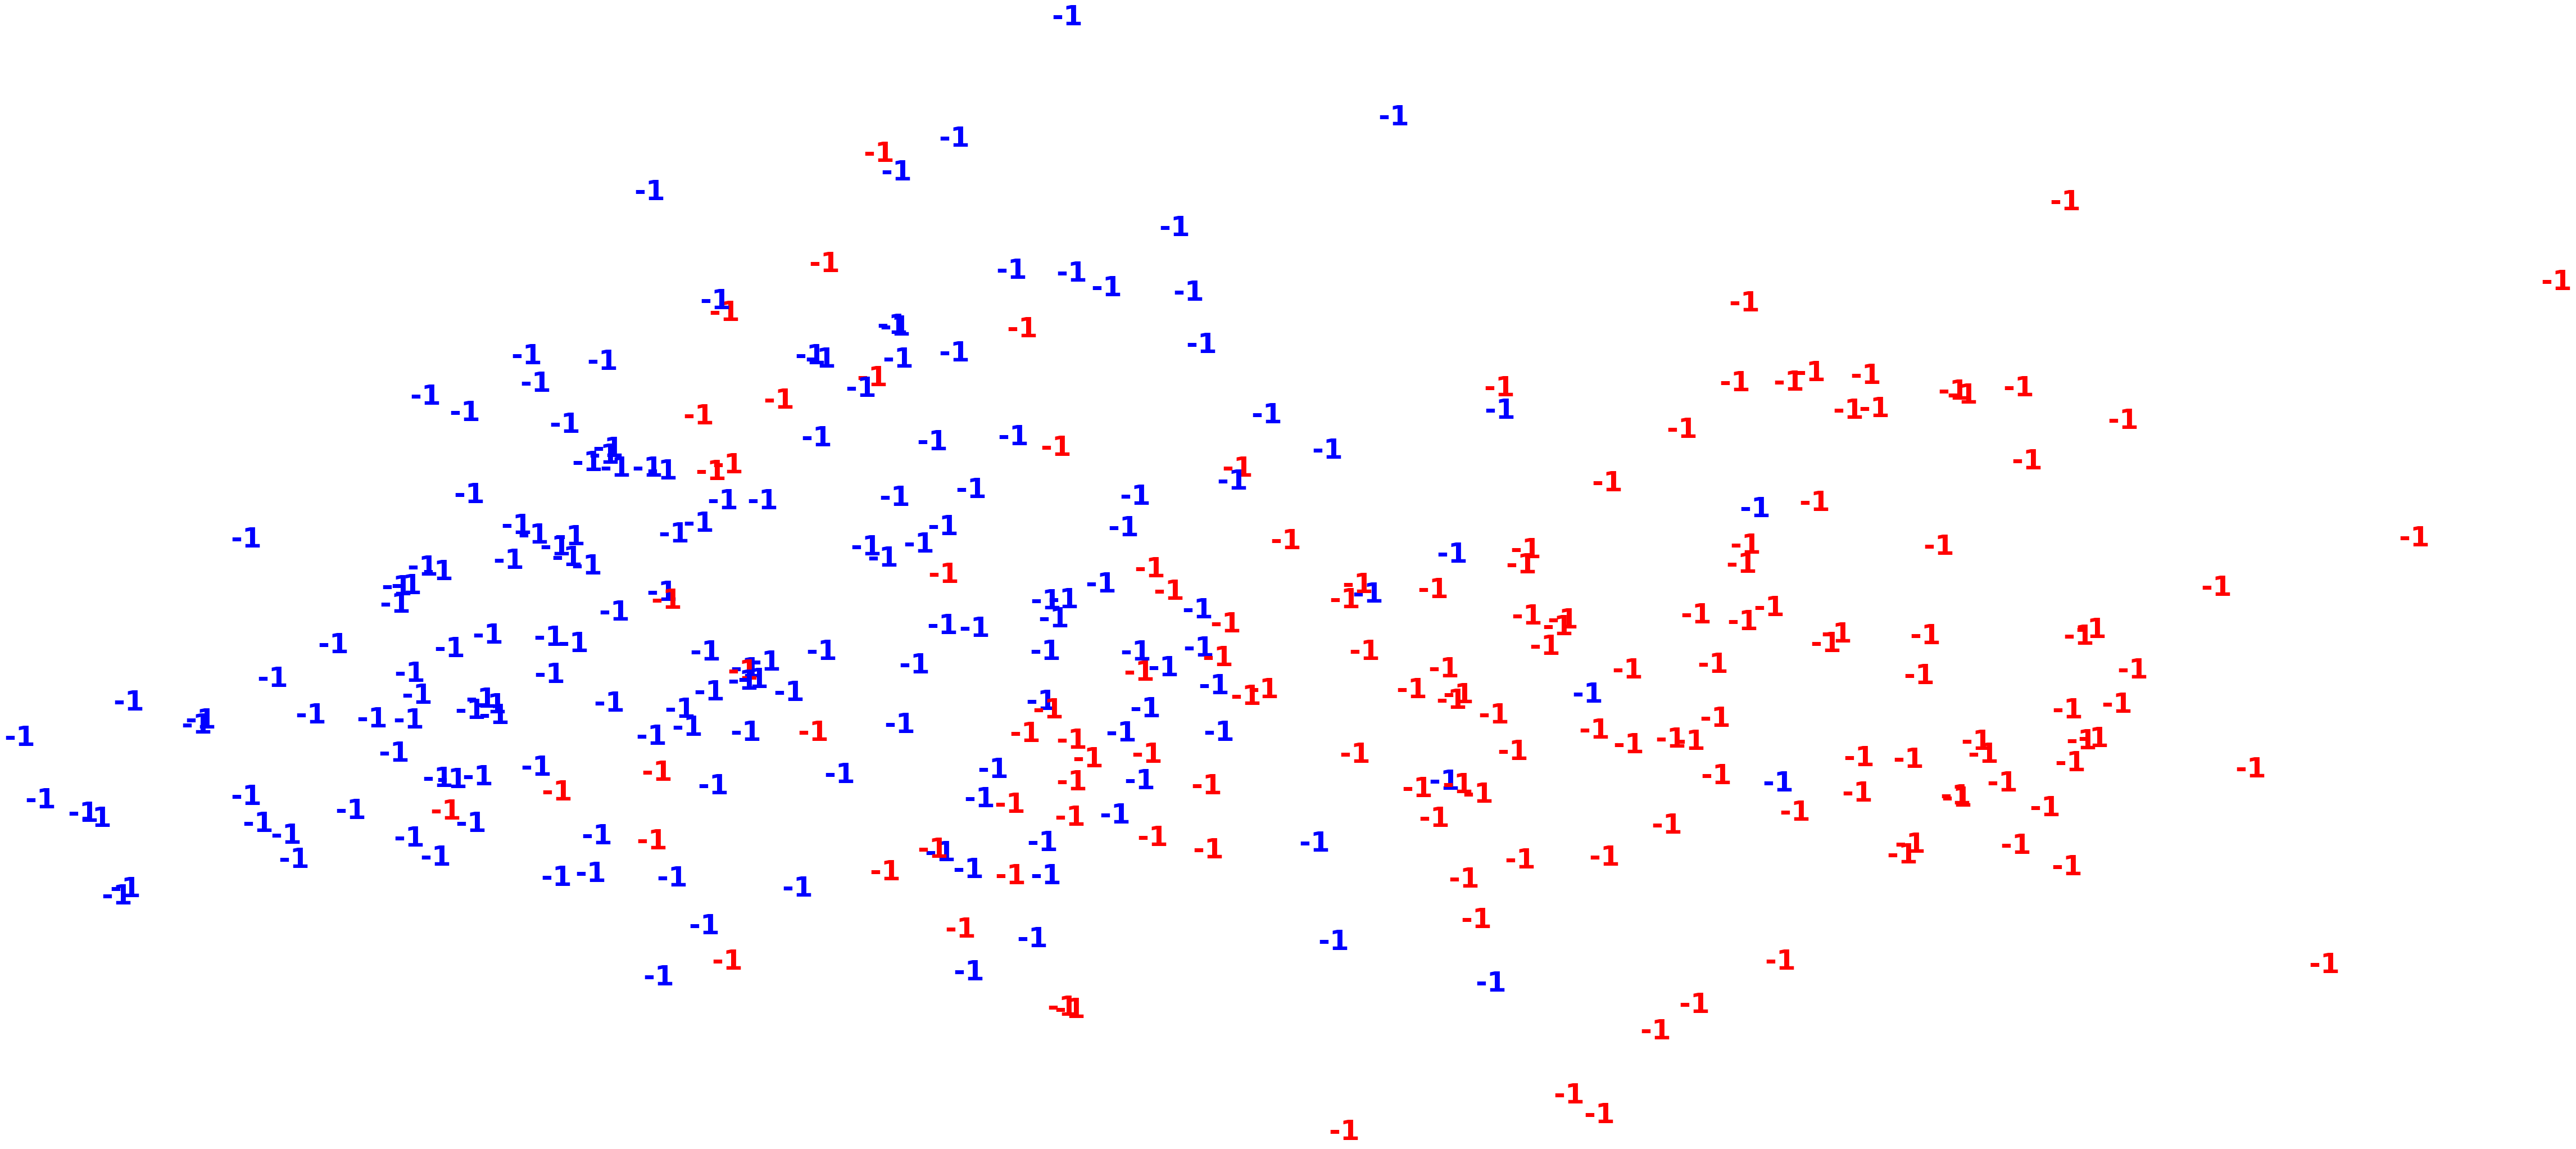

6


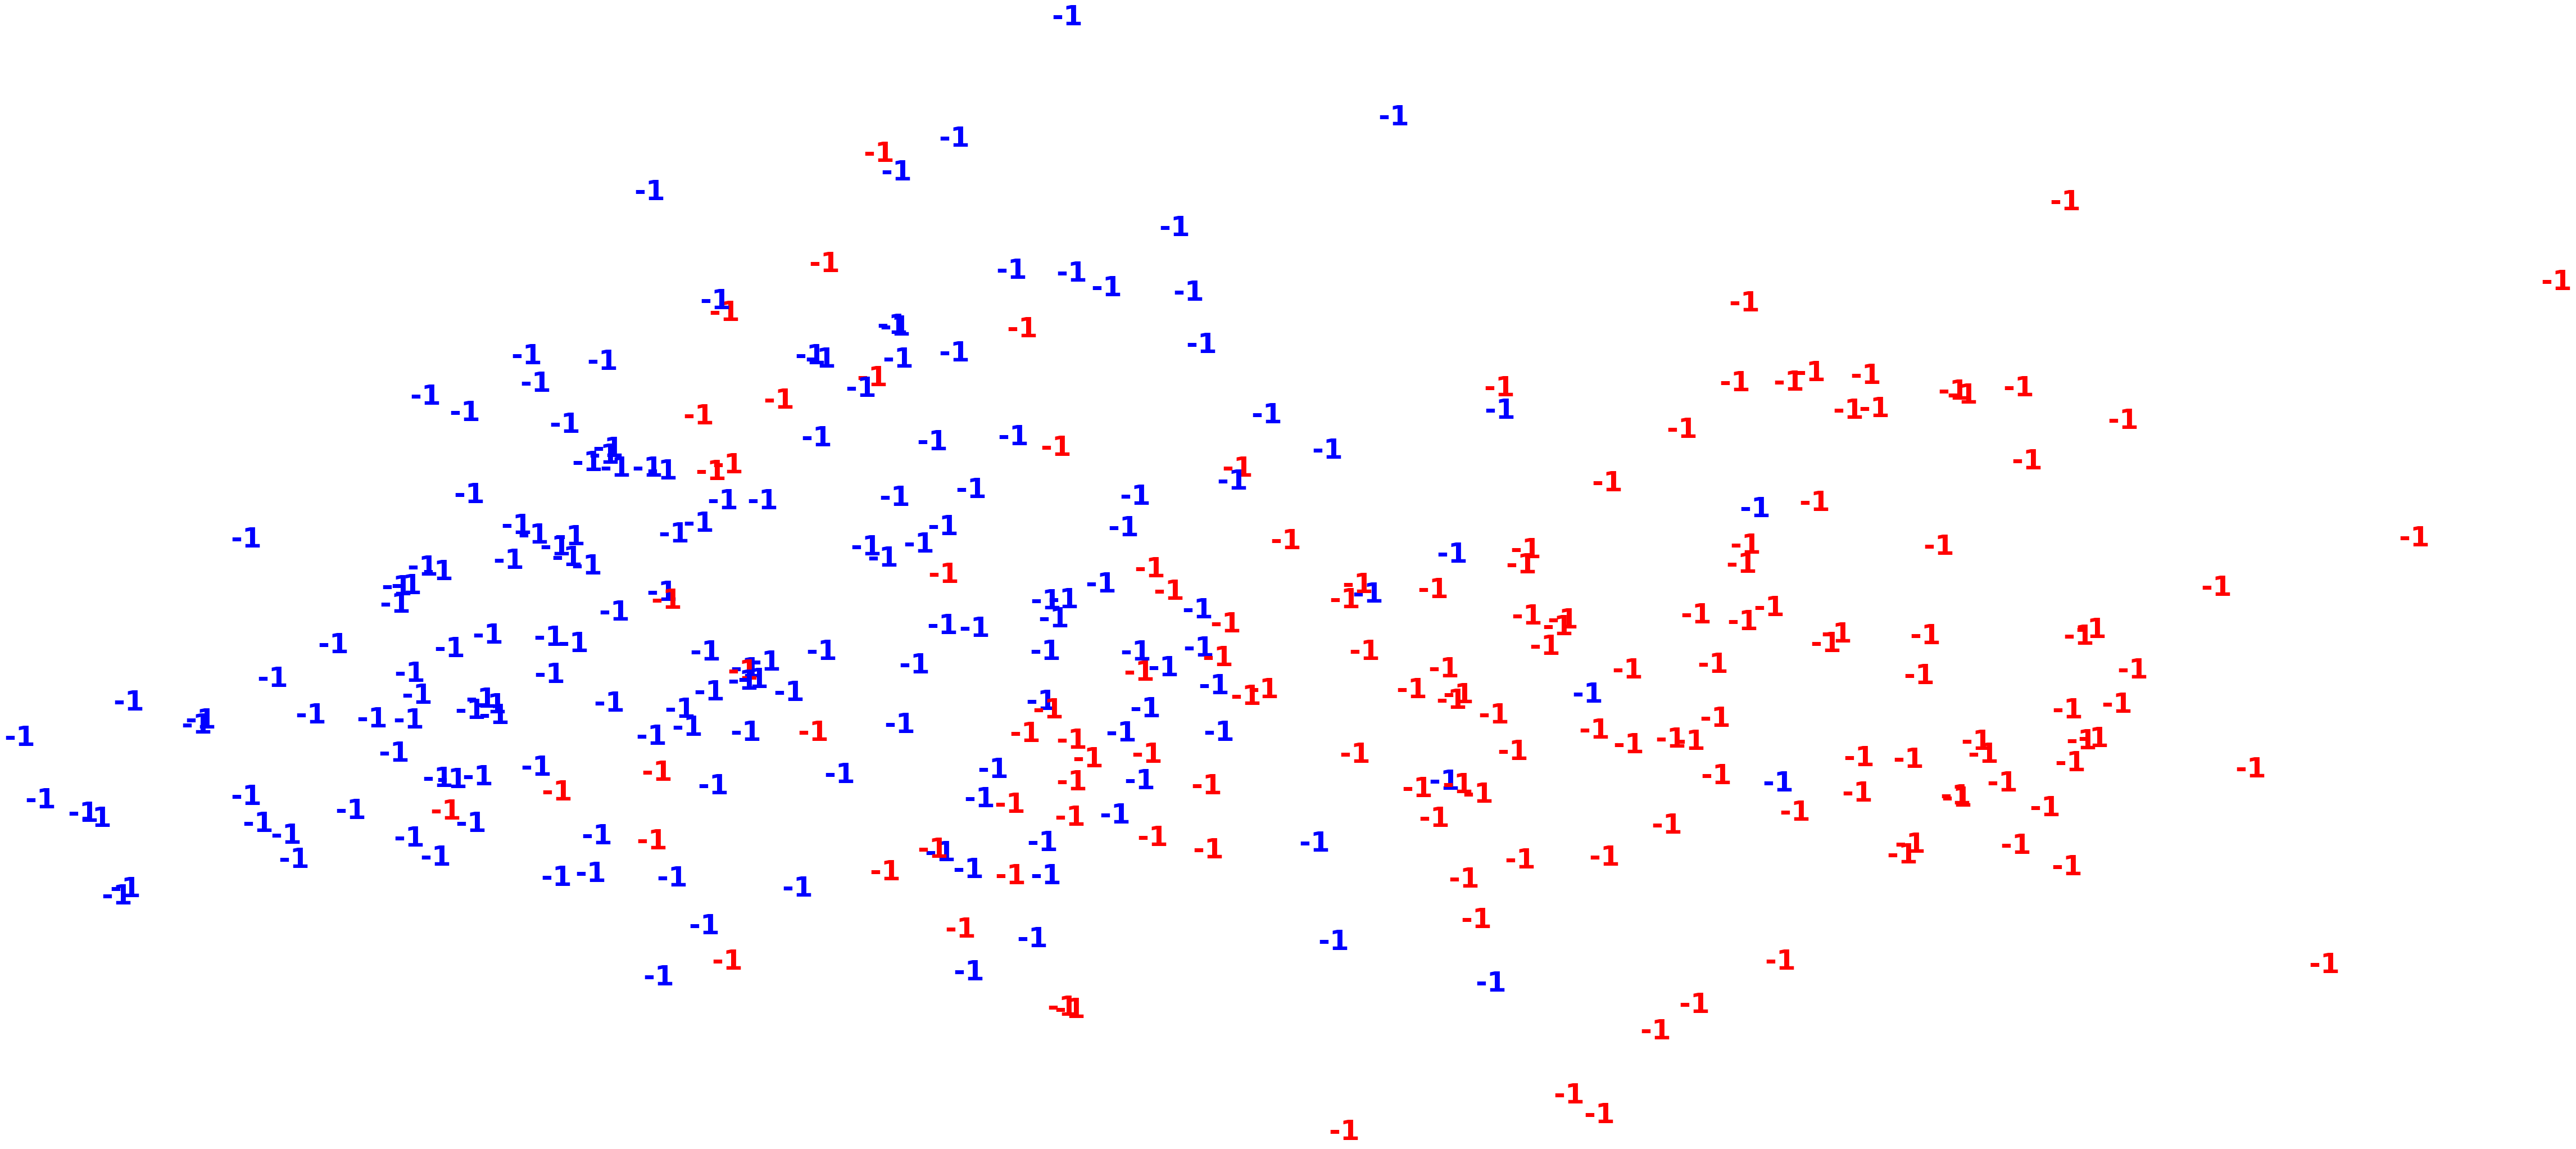

7


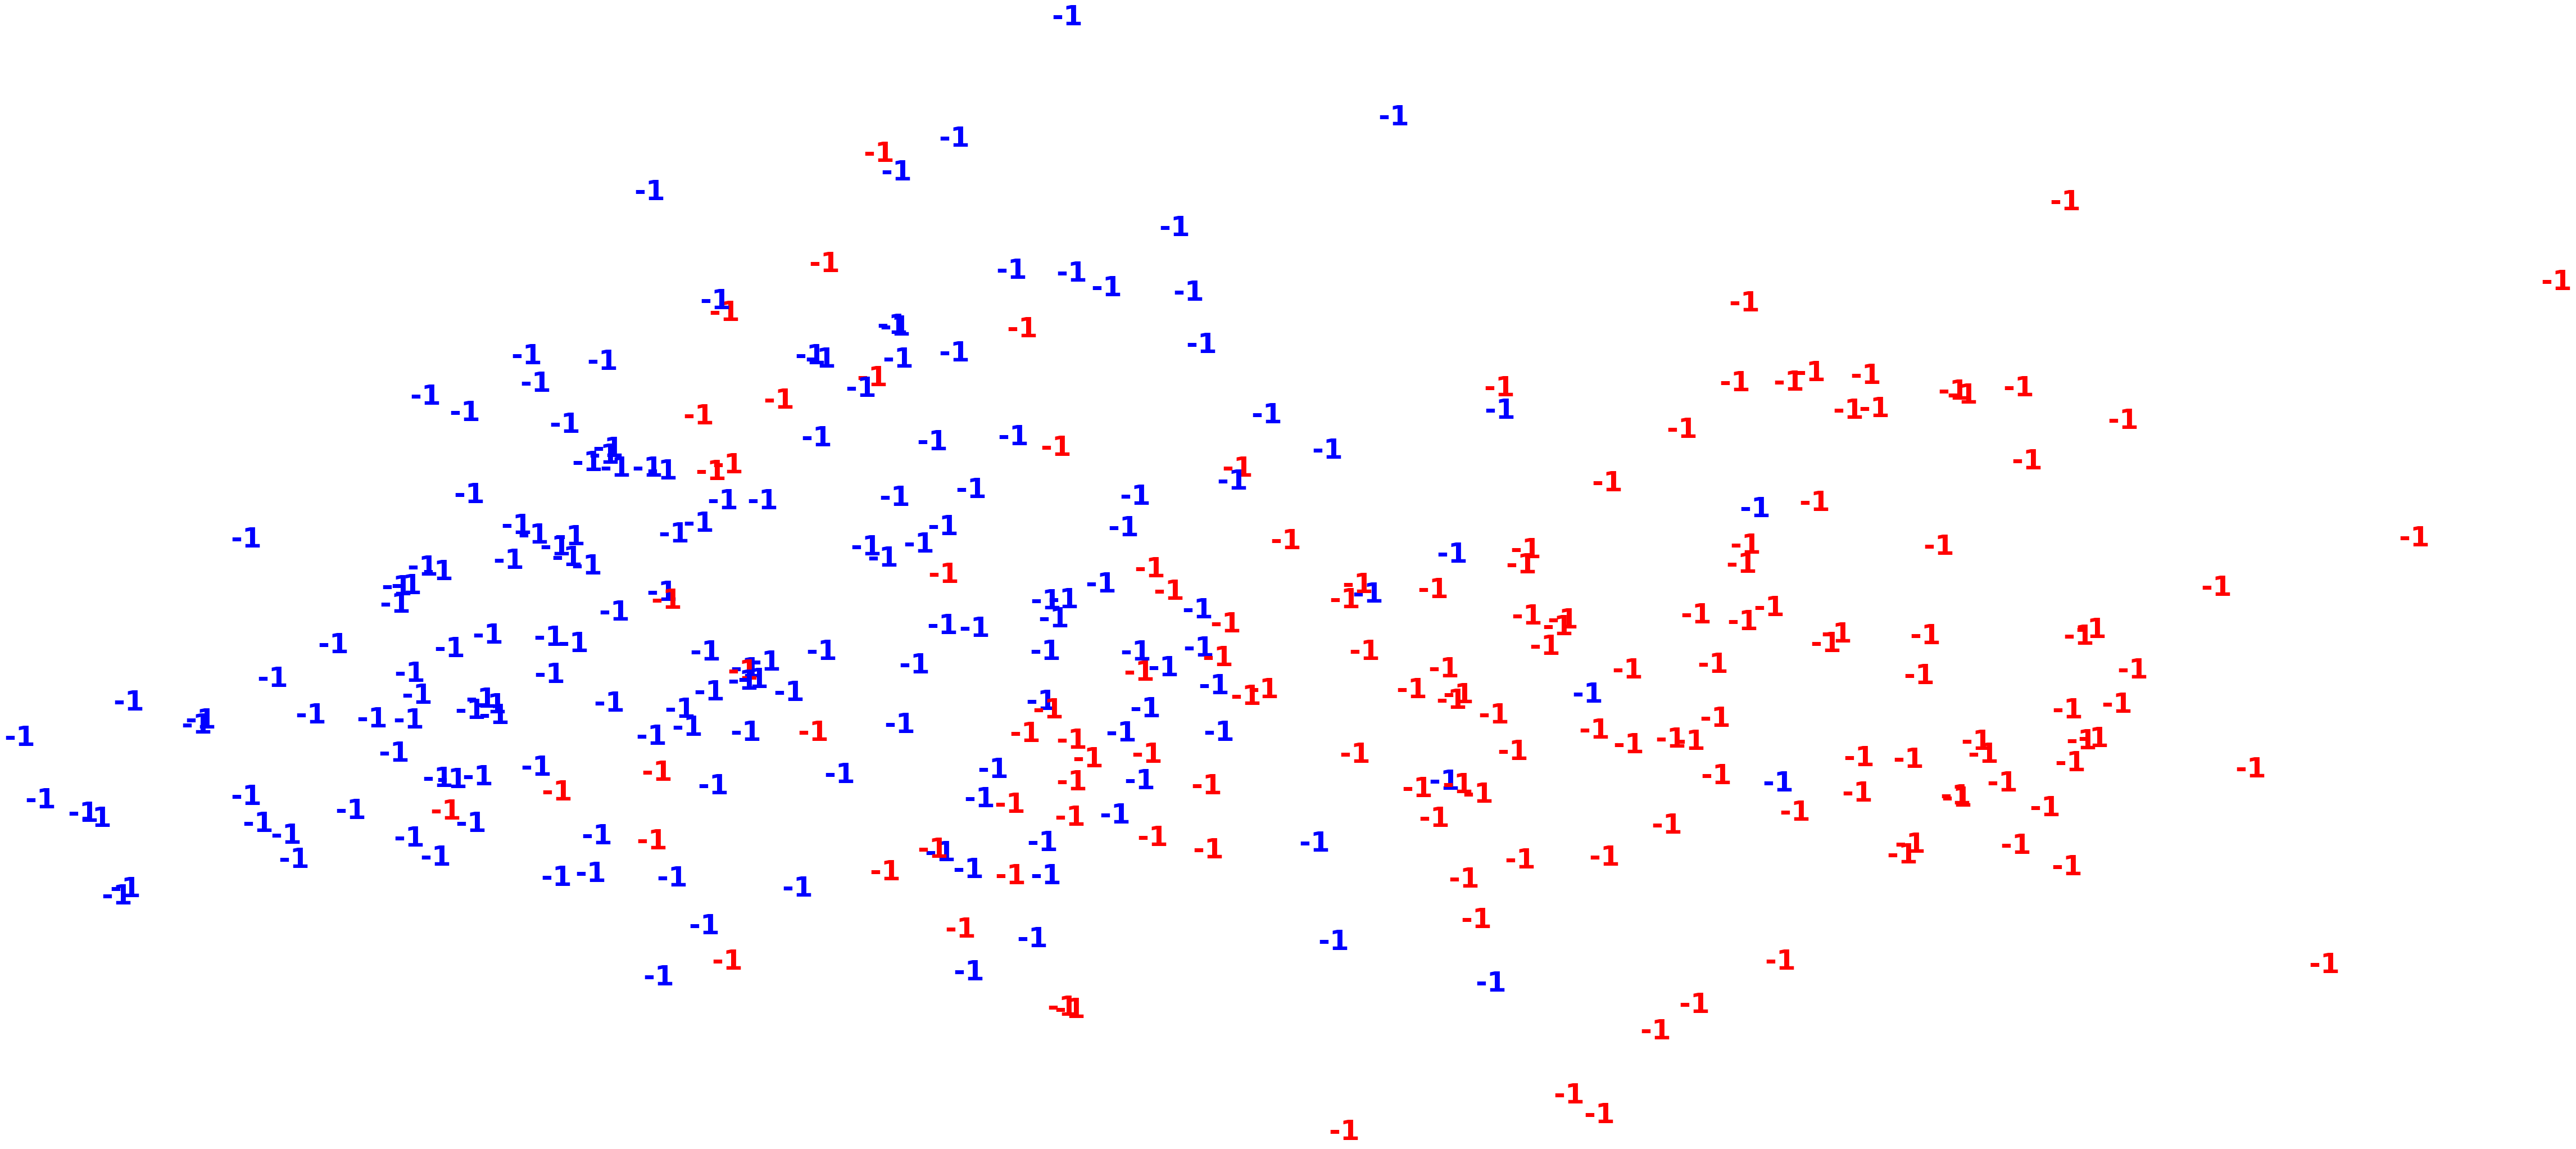

8


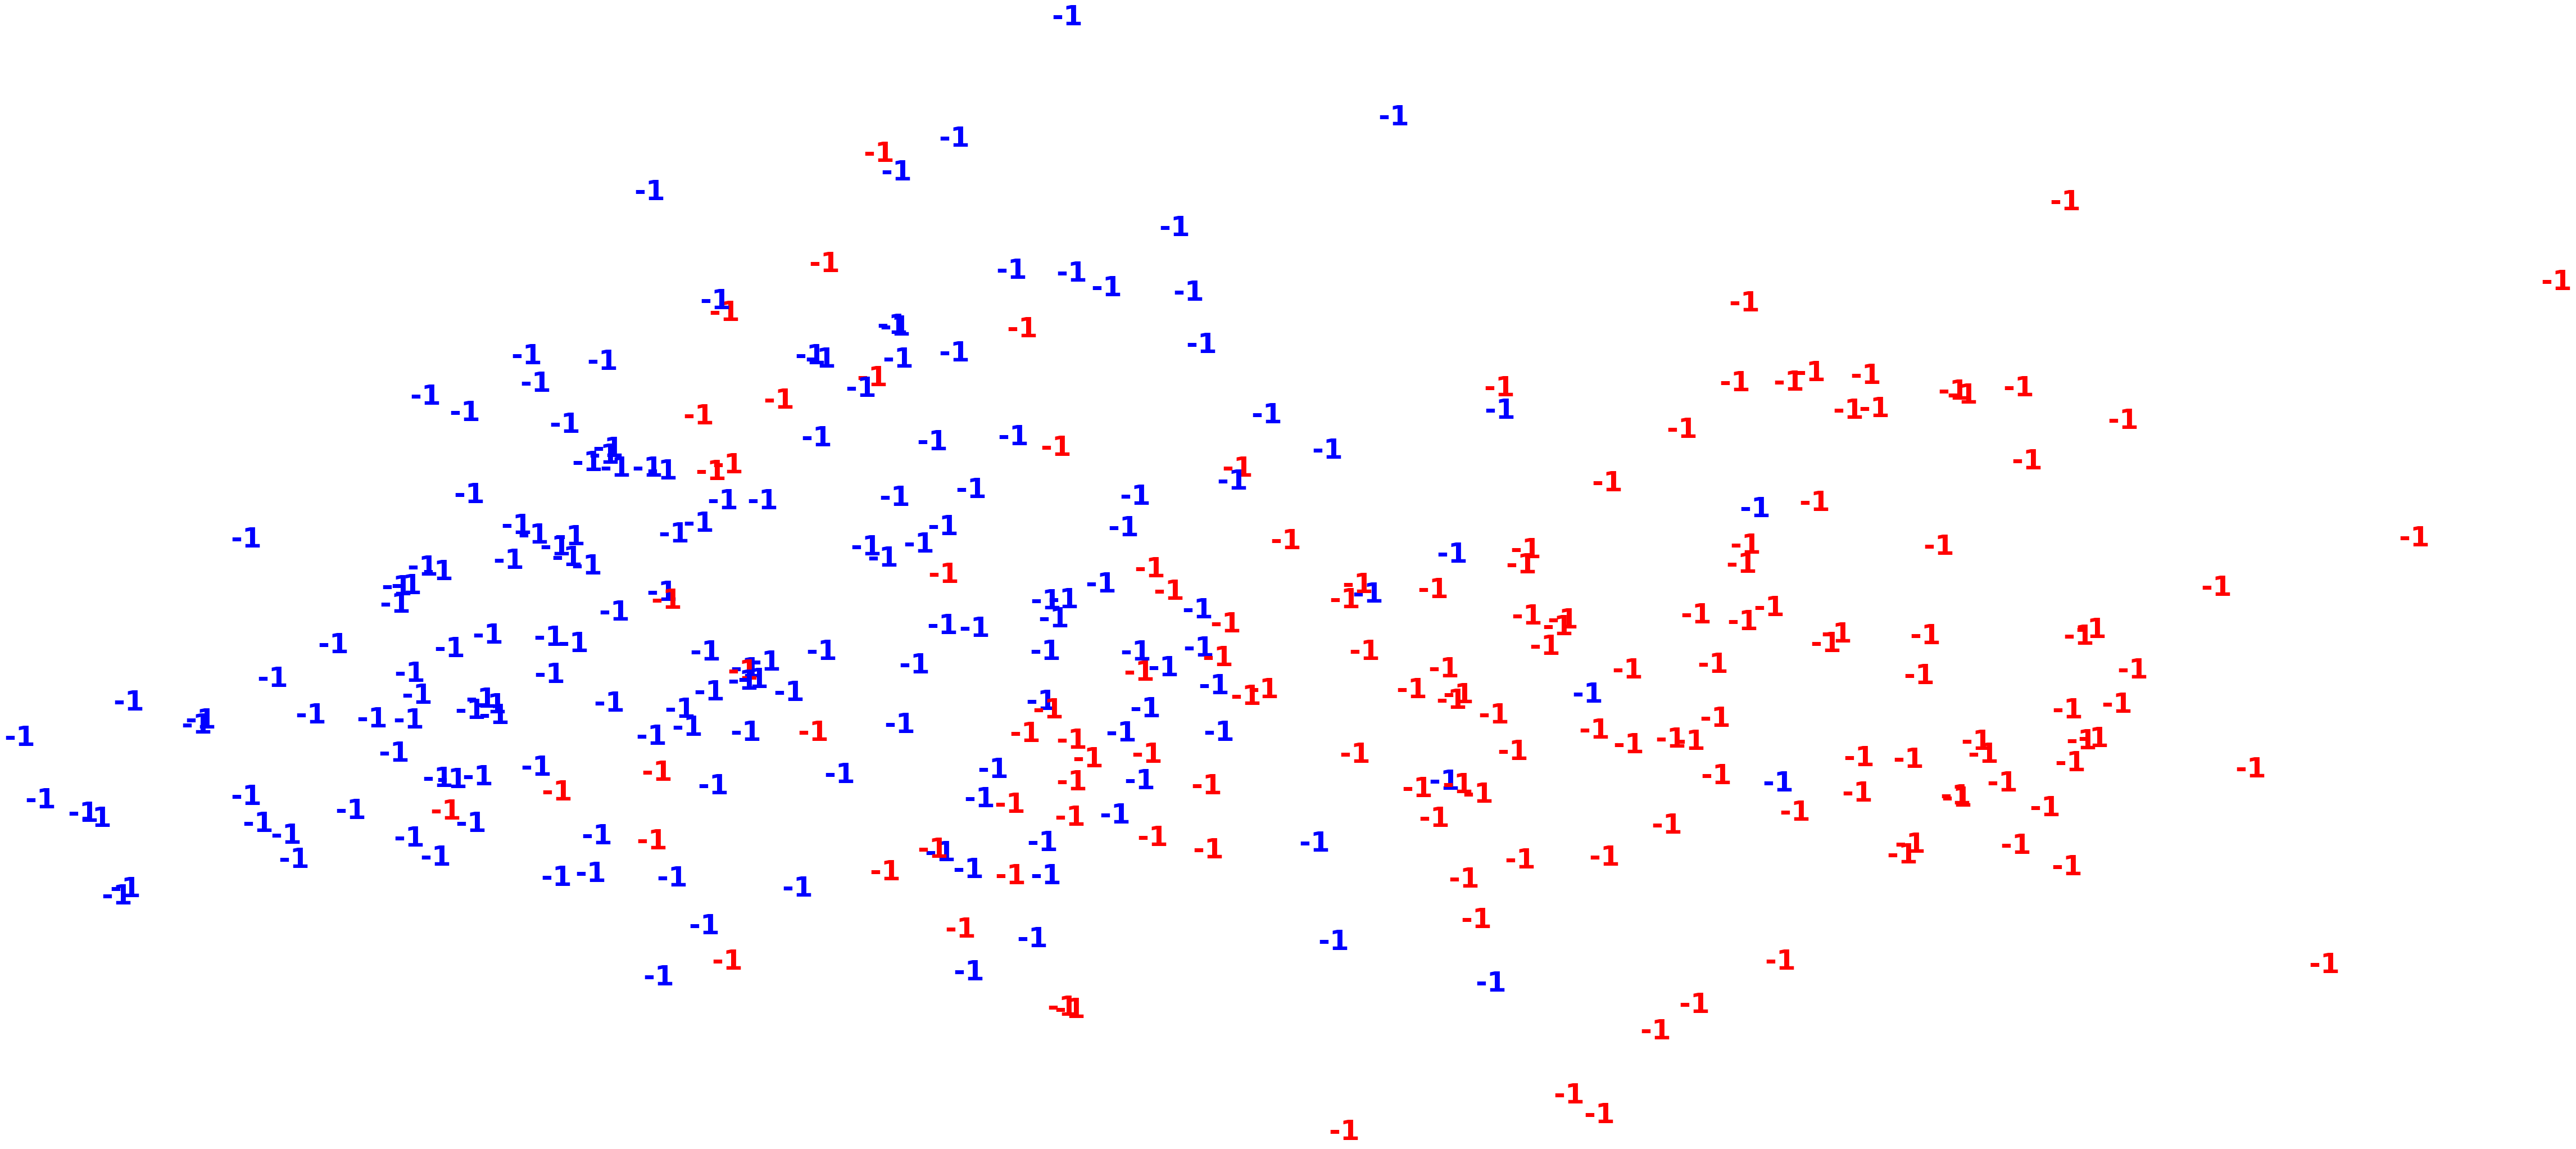

9


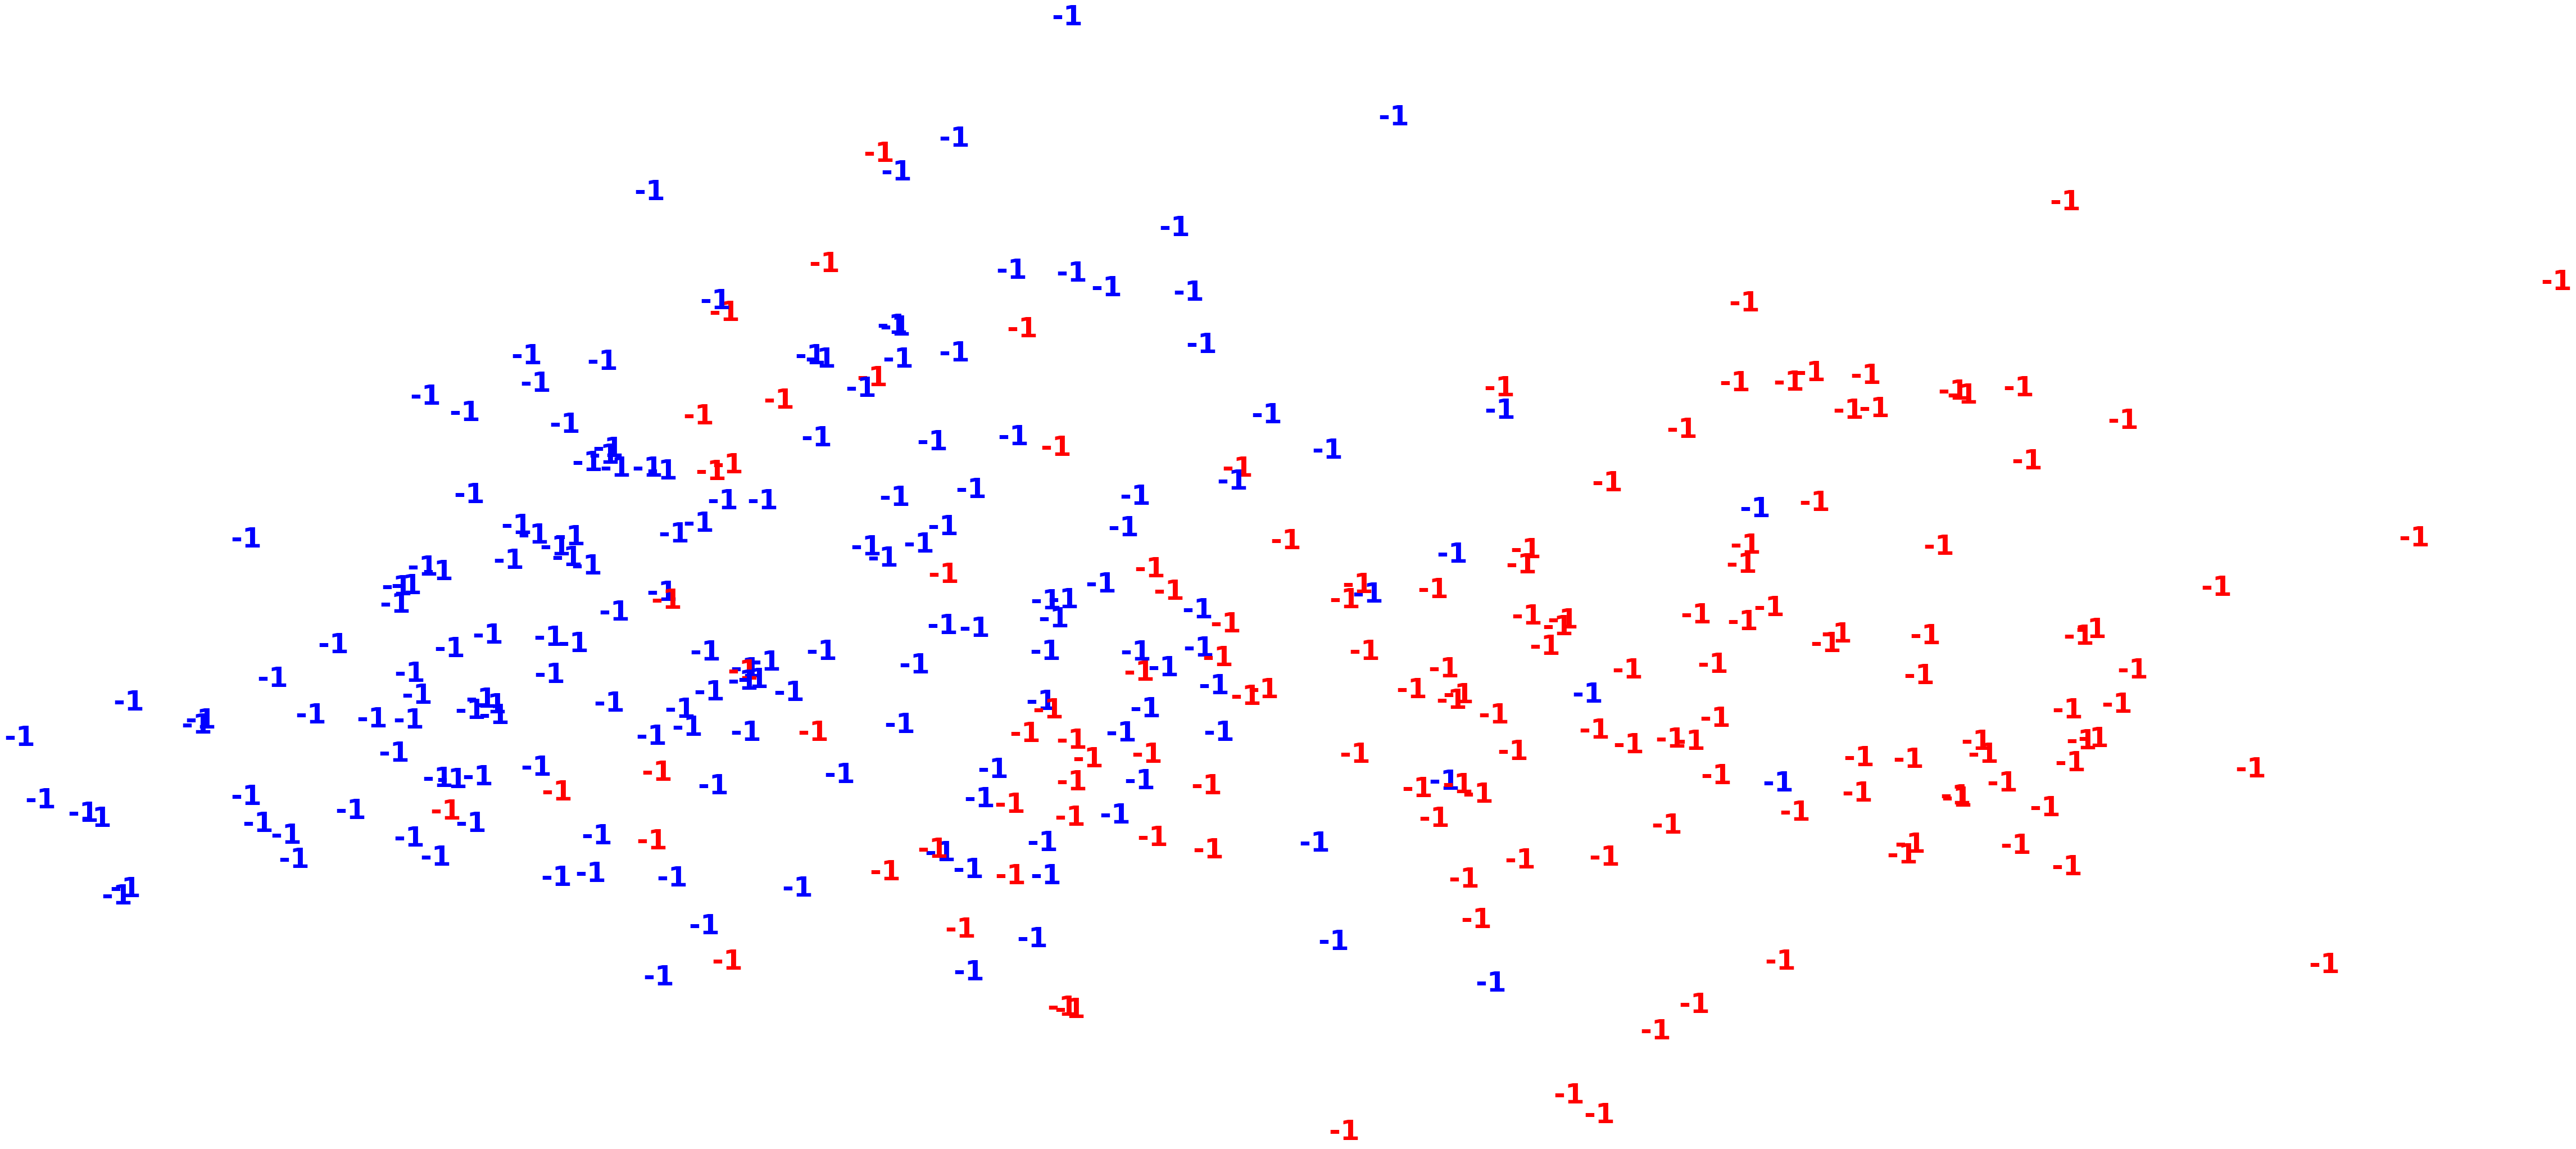

<IPython.core.display.Javascript object>

In [56]:
for j in np.arange(1, 10):
    # Defining the agglomerative clustering
    print(j)
    dbscan_cluster = DBSCAN(eps=1, min_samples=j, metric="euclidean")

    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)

    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10, 5))
    colours = "rbg"
    for i in range(pca.shape[0]):
        plt.text(
            pca[i, 0],
            pca[i, 1],
            str(clusters[i]),
            color=colours[y[i]],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show()

As min_samples increases, so does the size of the clusters.  More points become outliers if they don't have enough nearest neighbors.  However, this effect is not very clear in this example because epsilon is set at 1, which is too low for clustering to occur.

## 3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

2.25


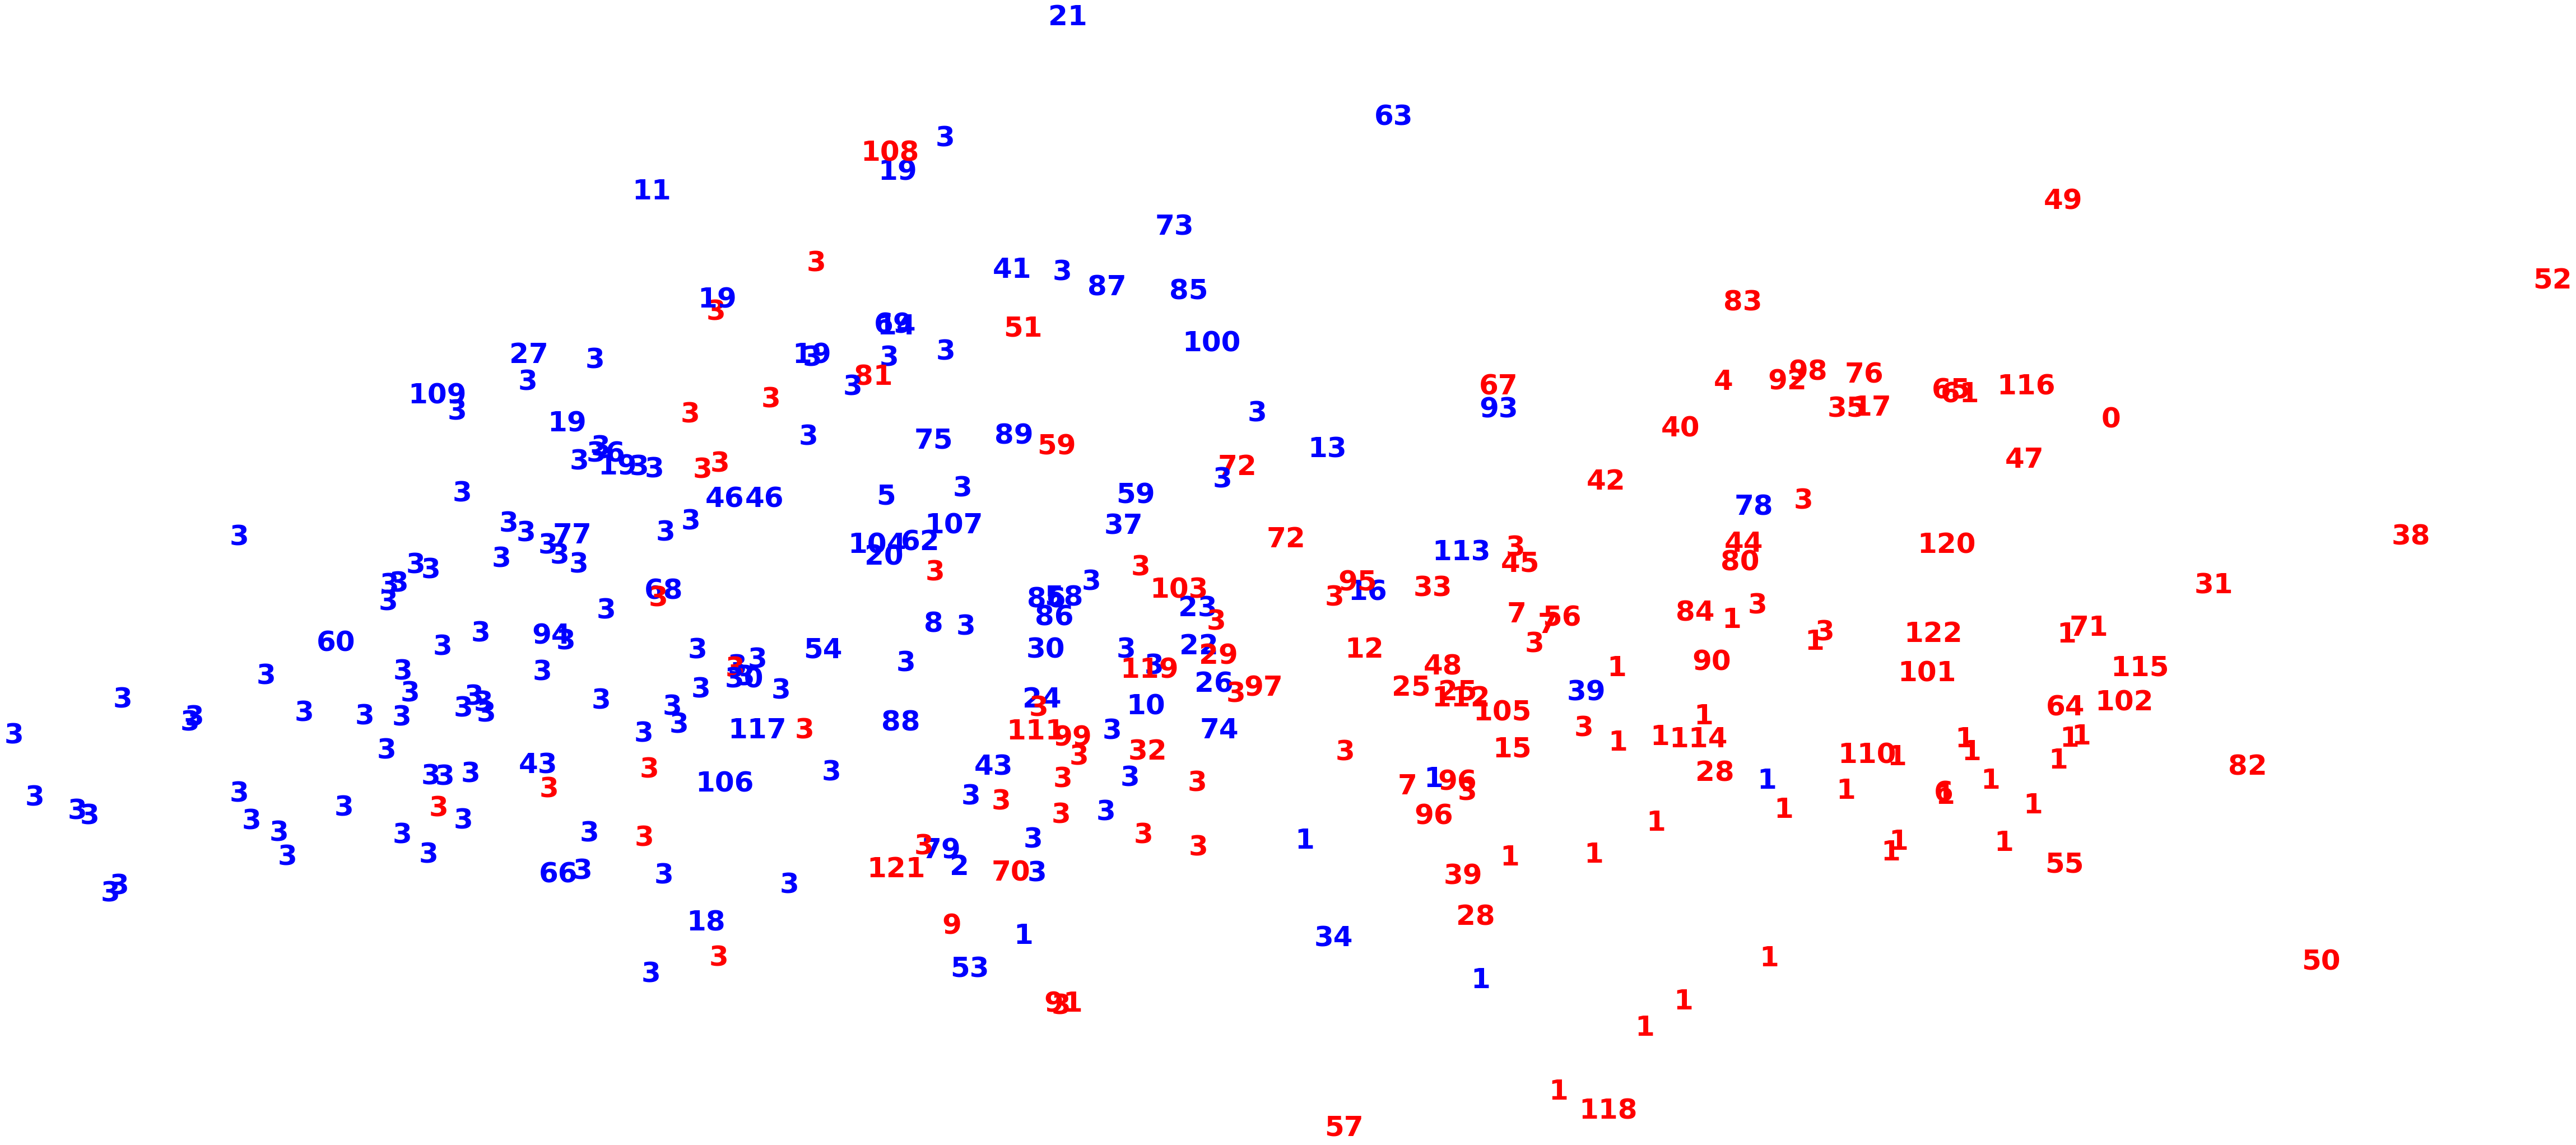

2.5


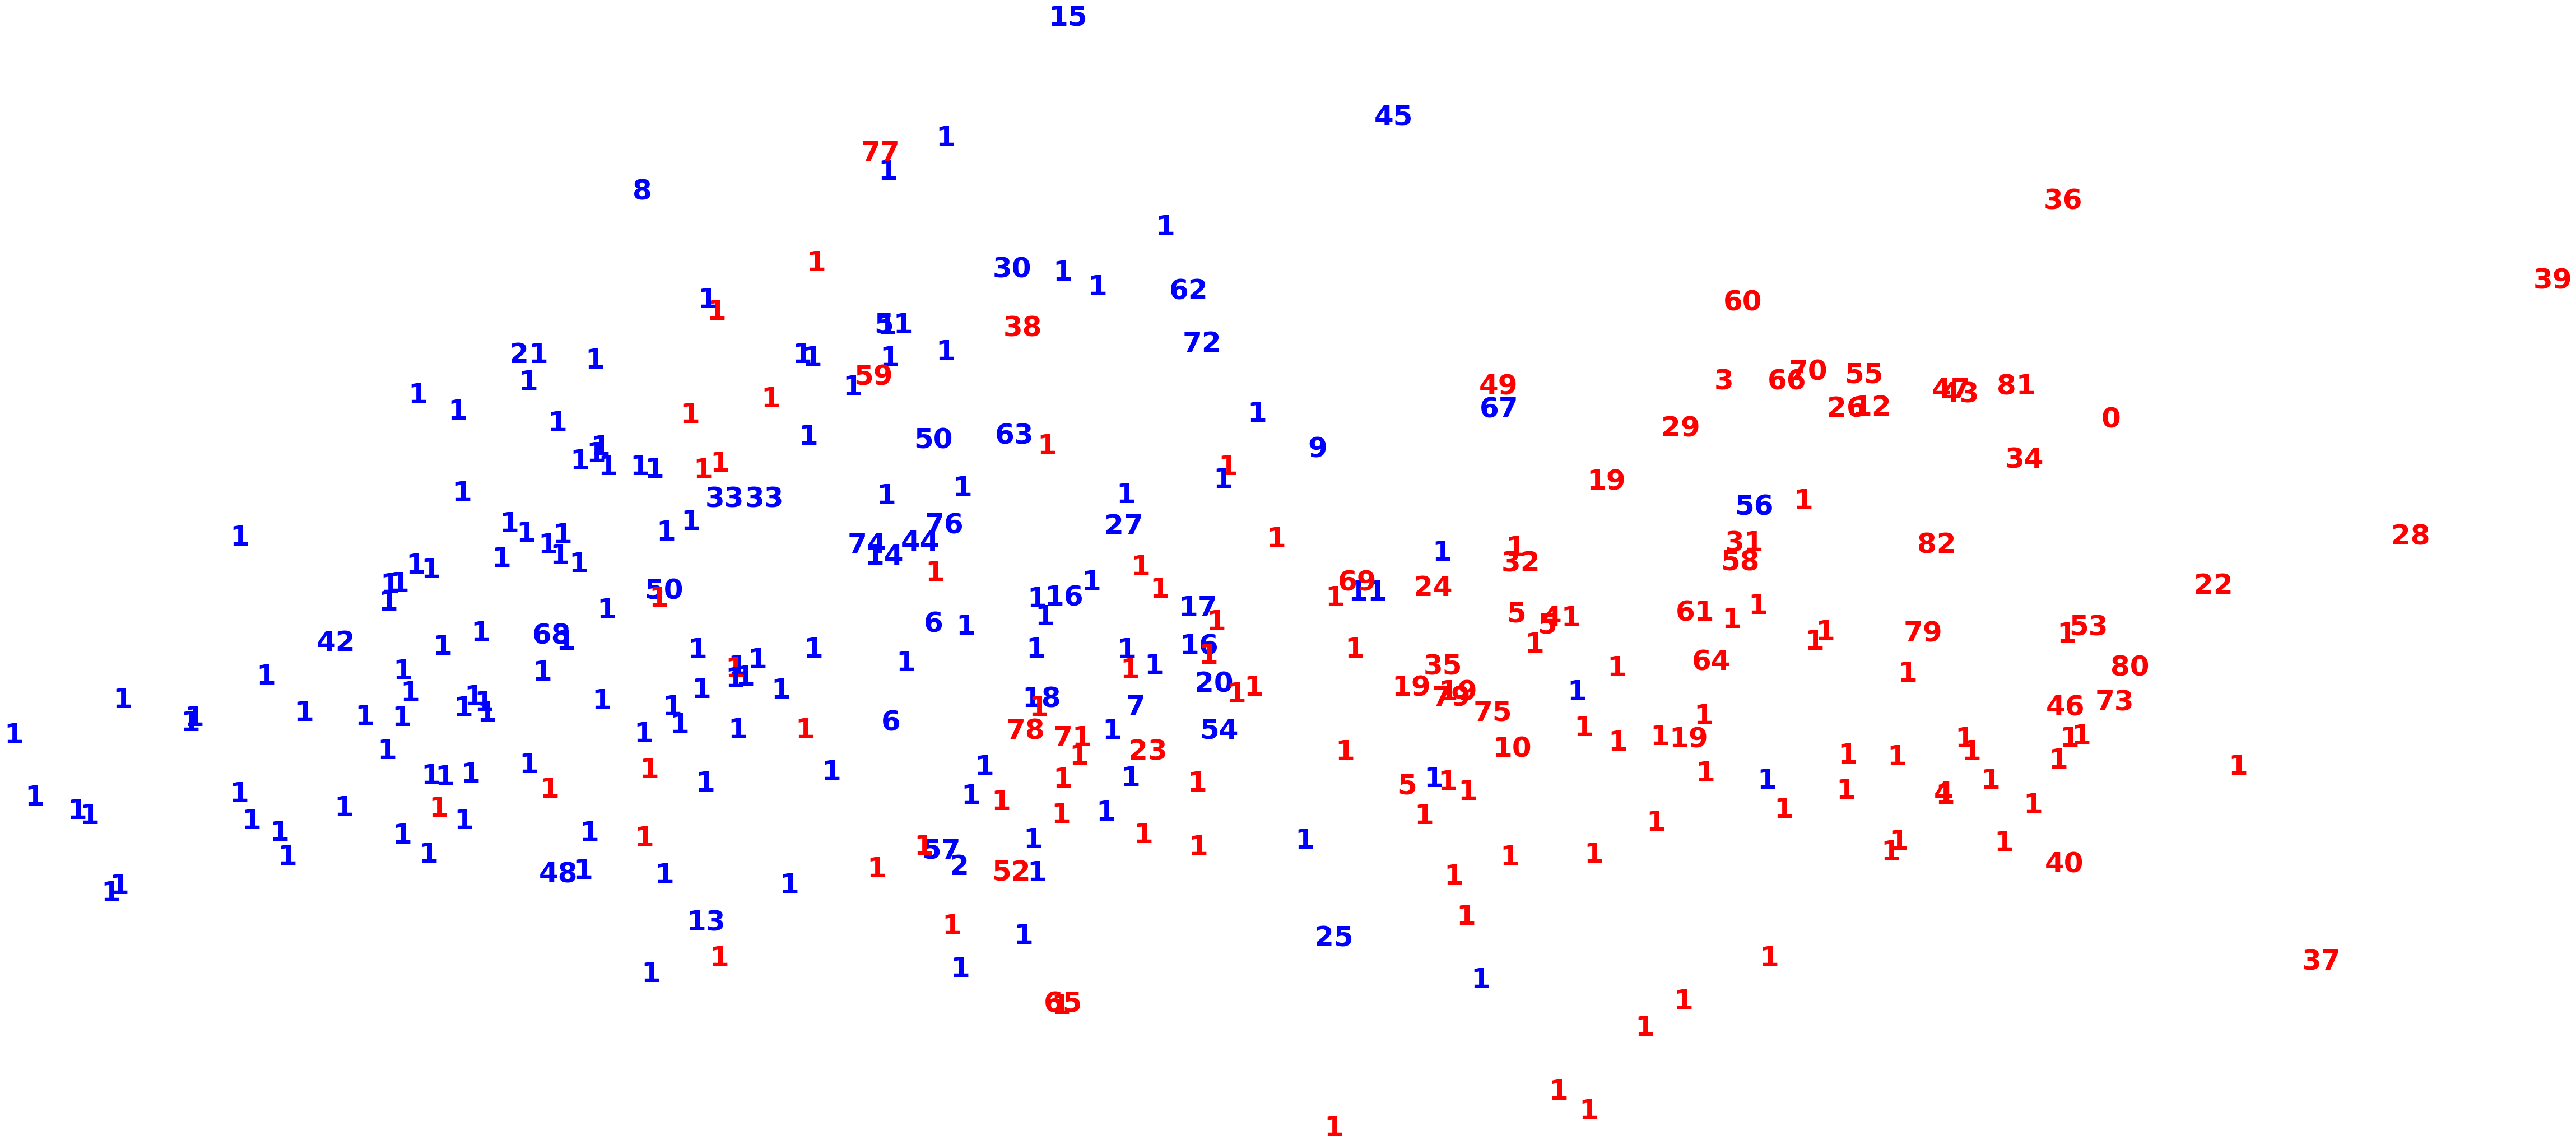

2.75


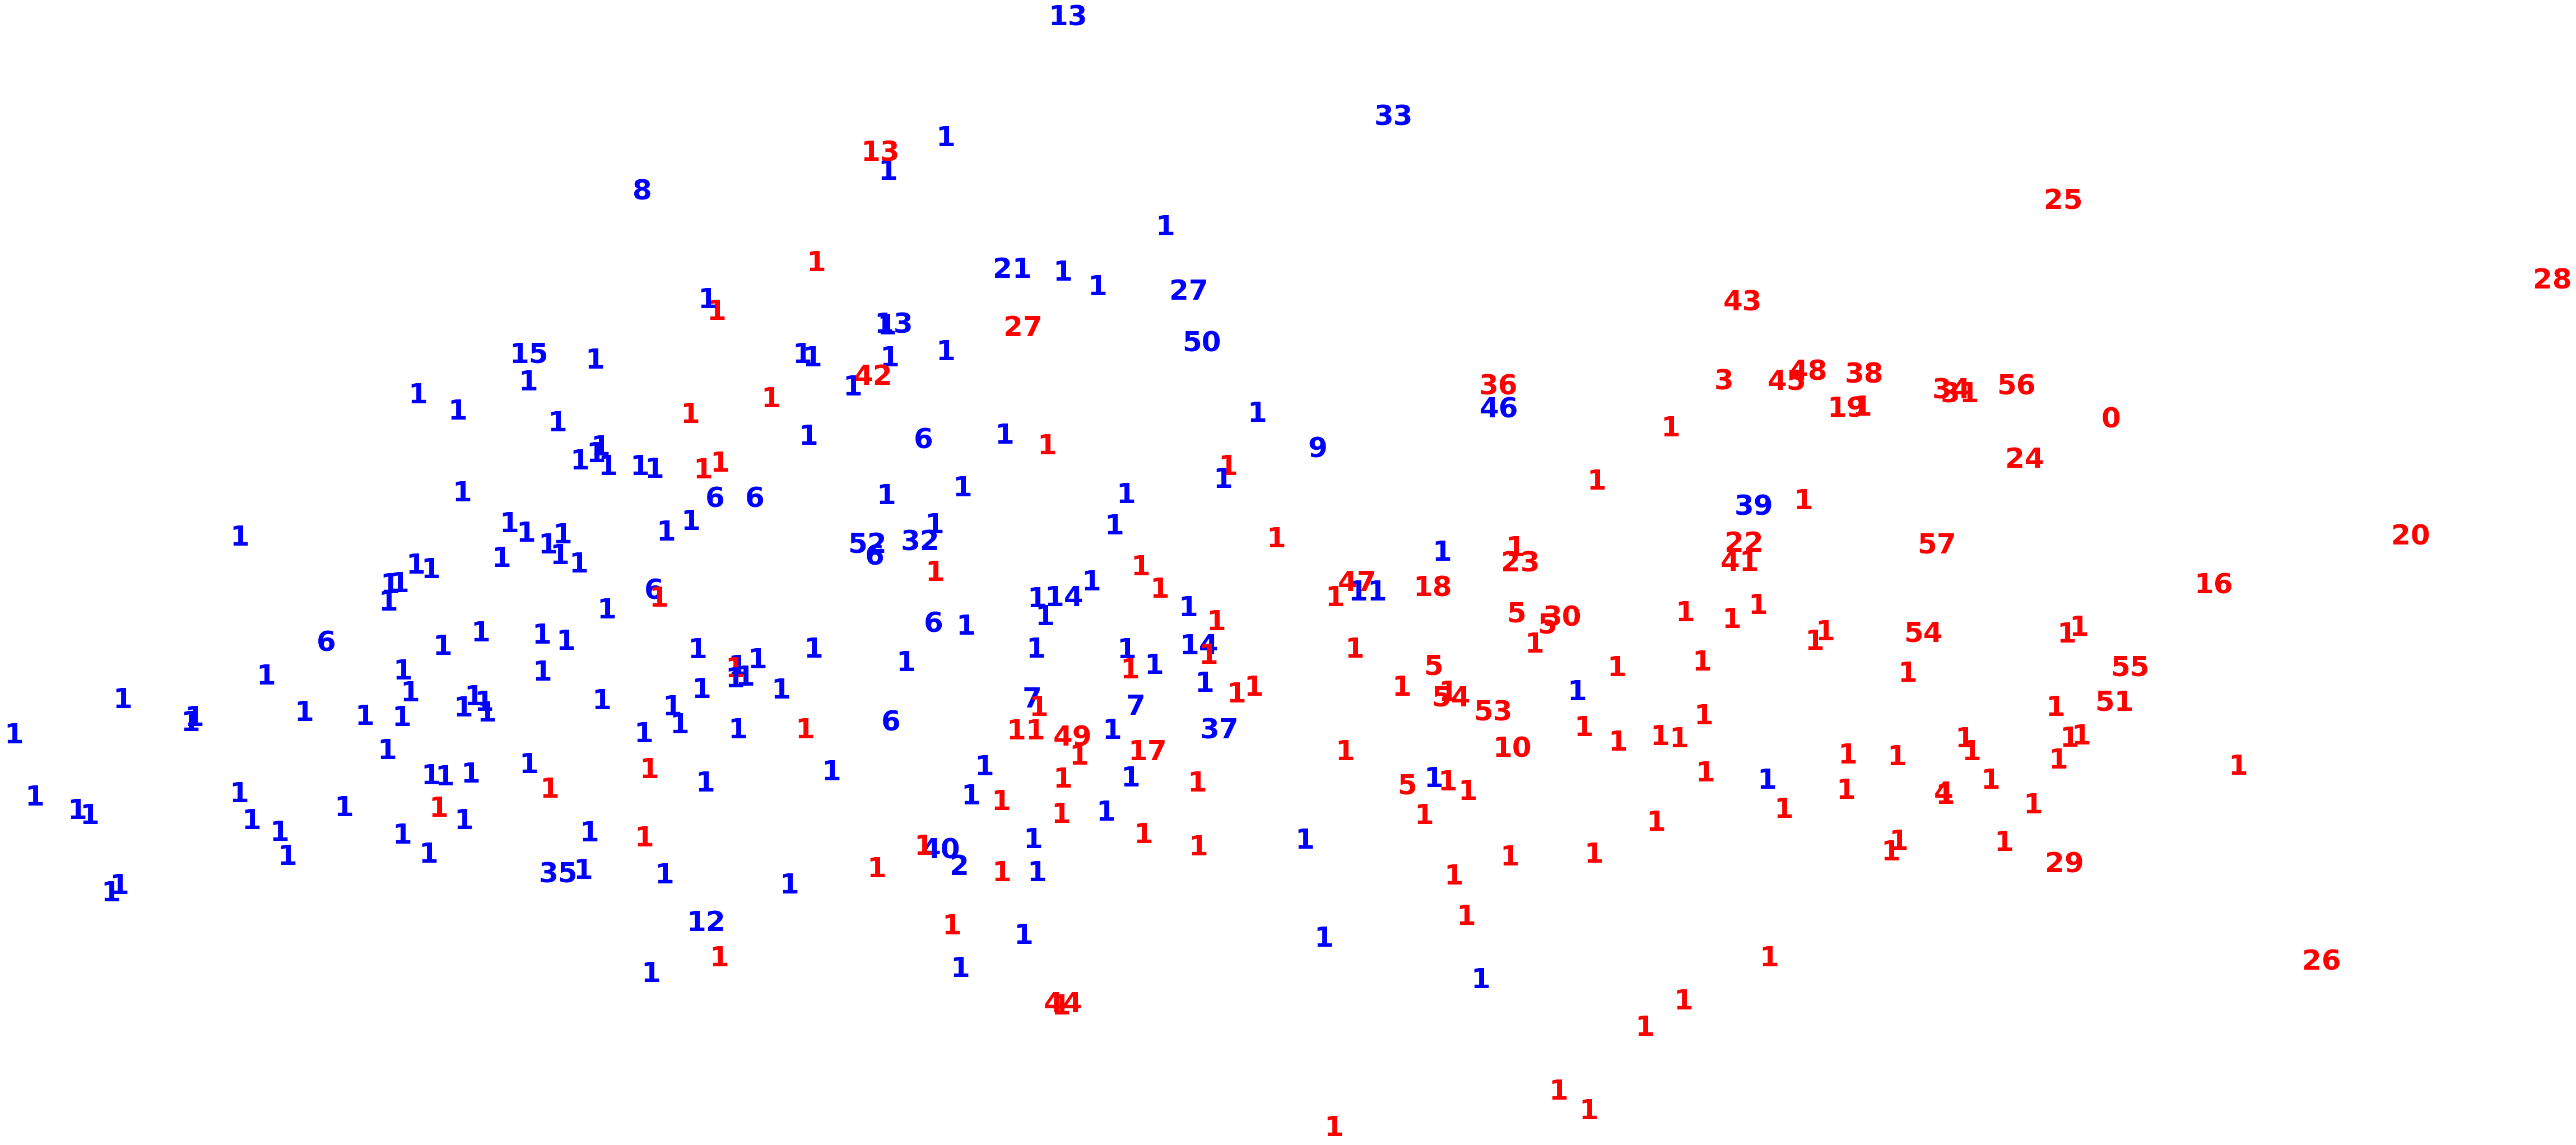

3.0


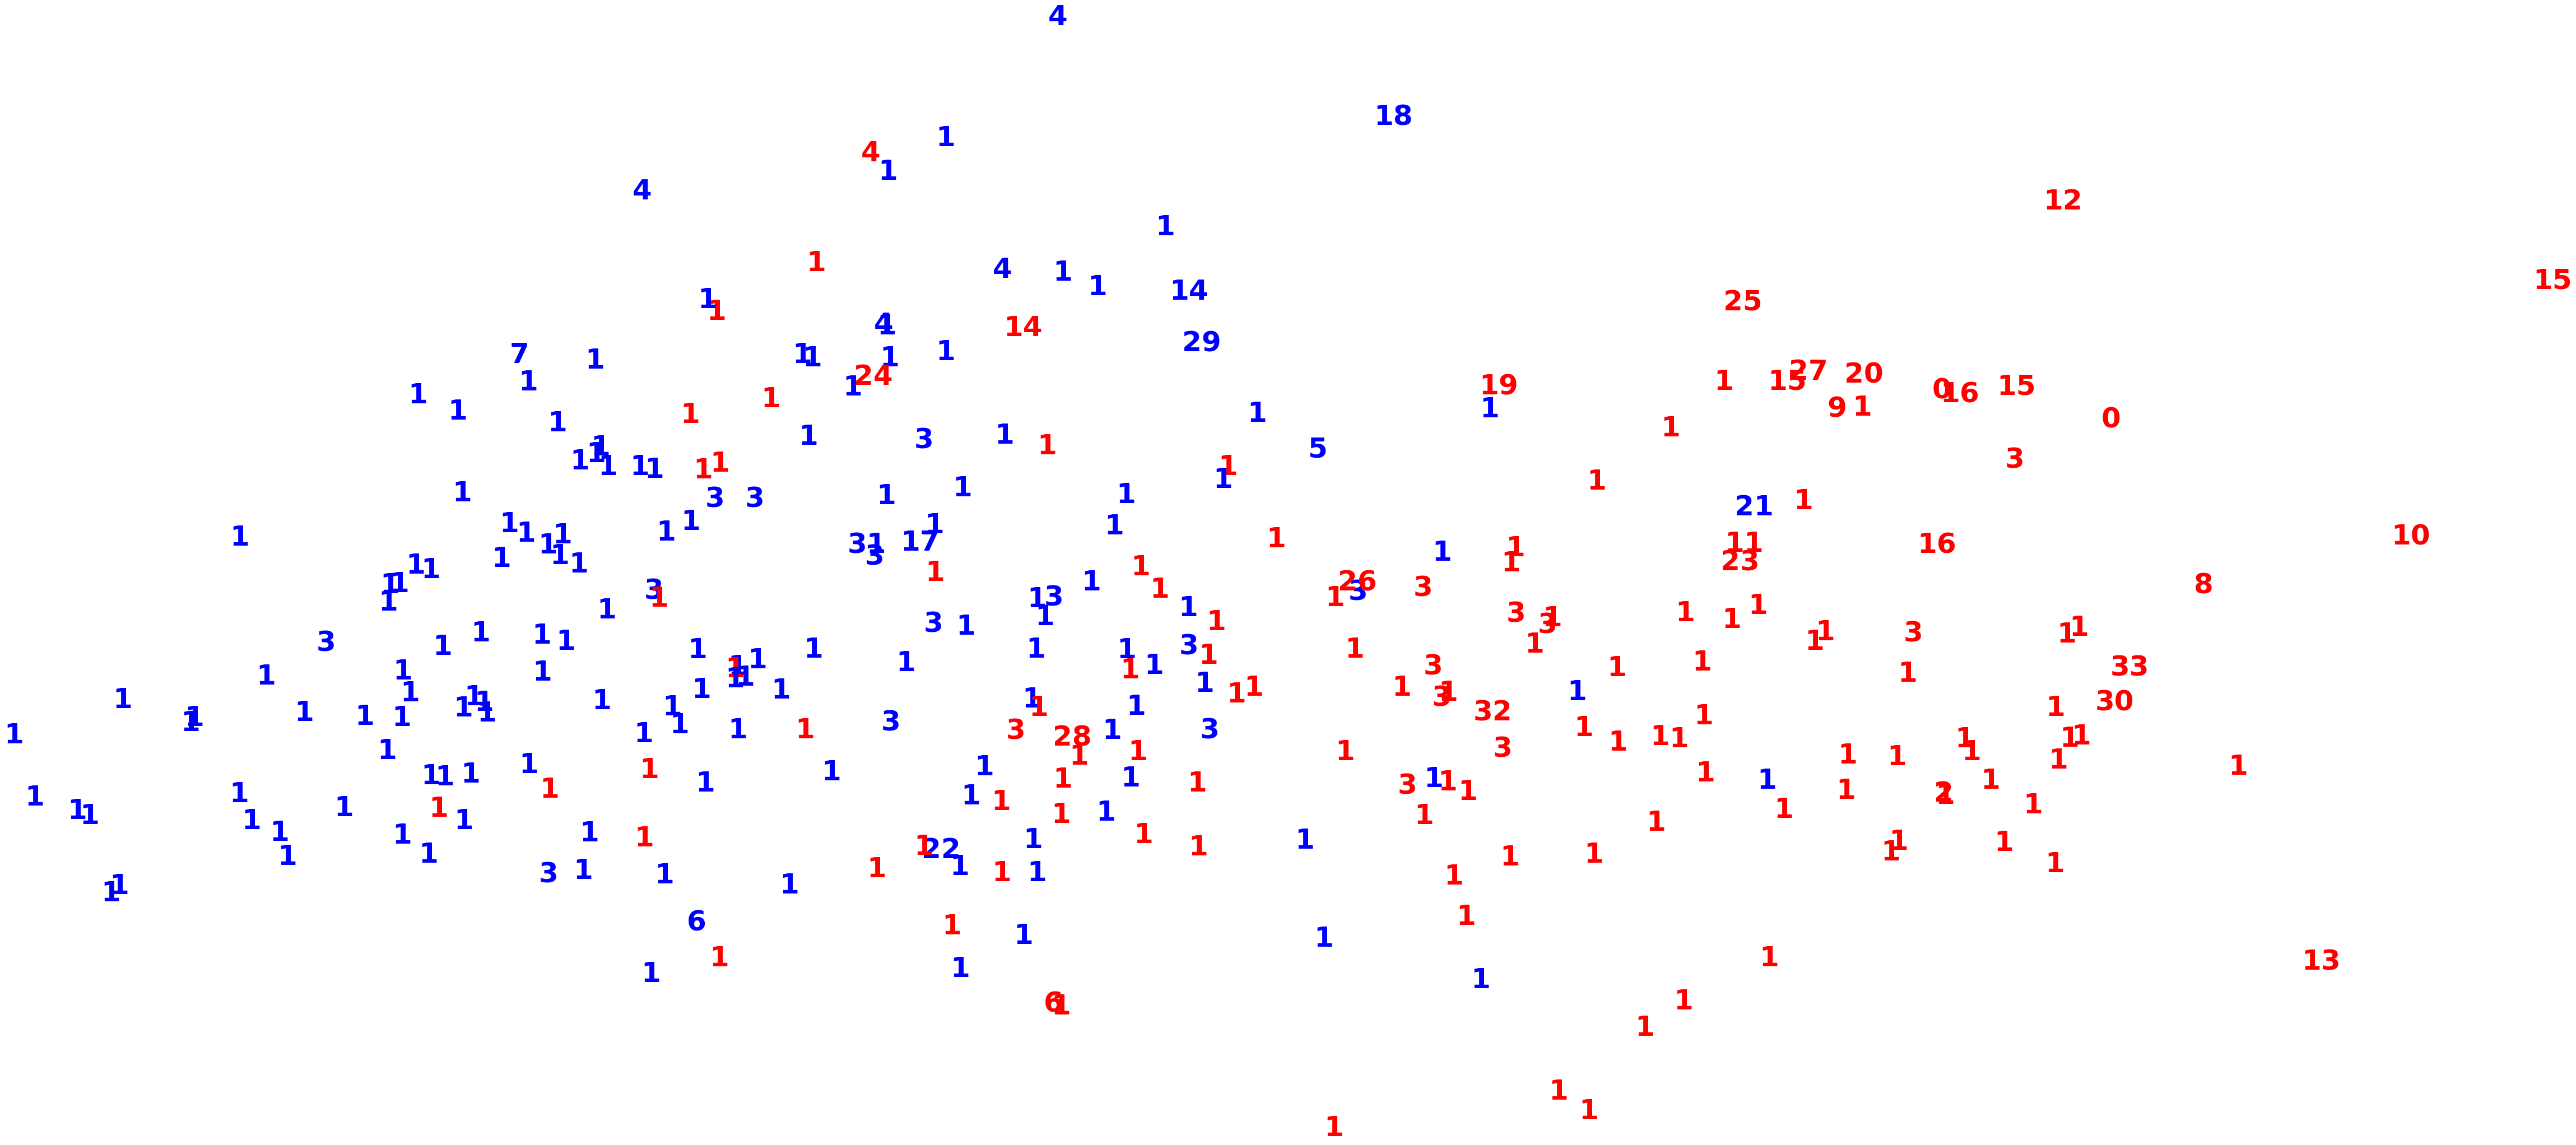

3.25


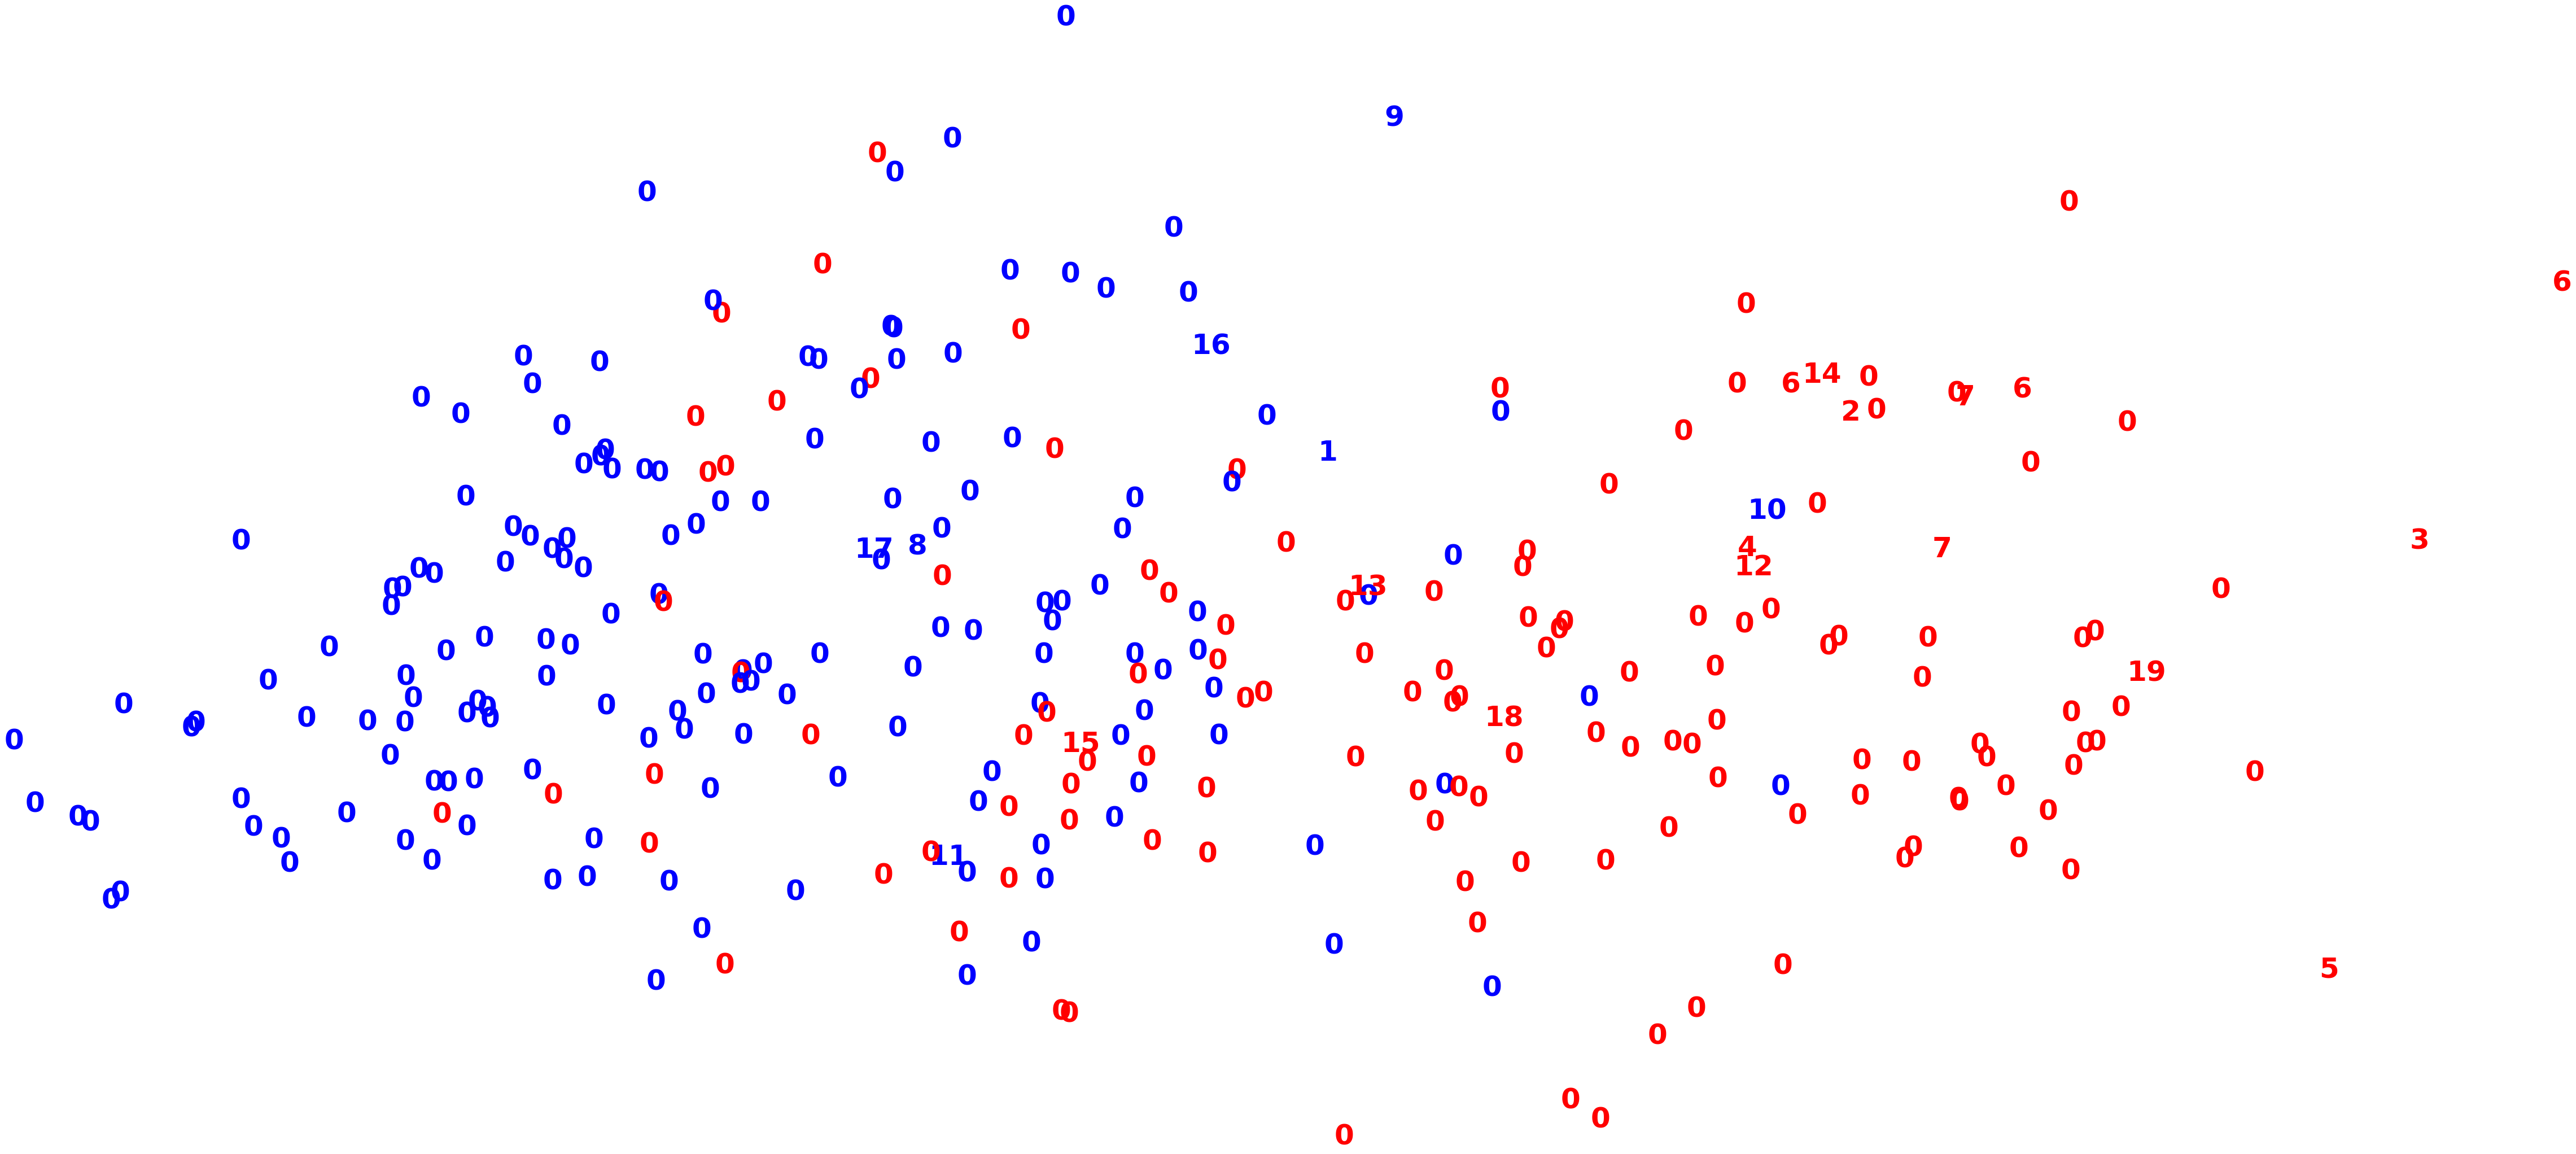

3.5


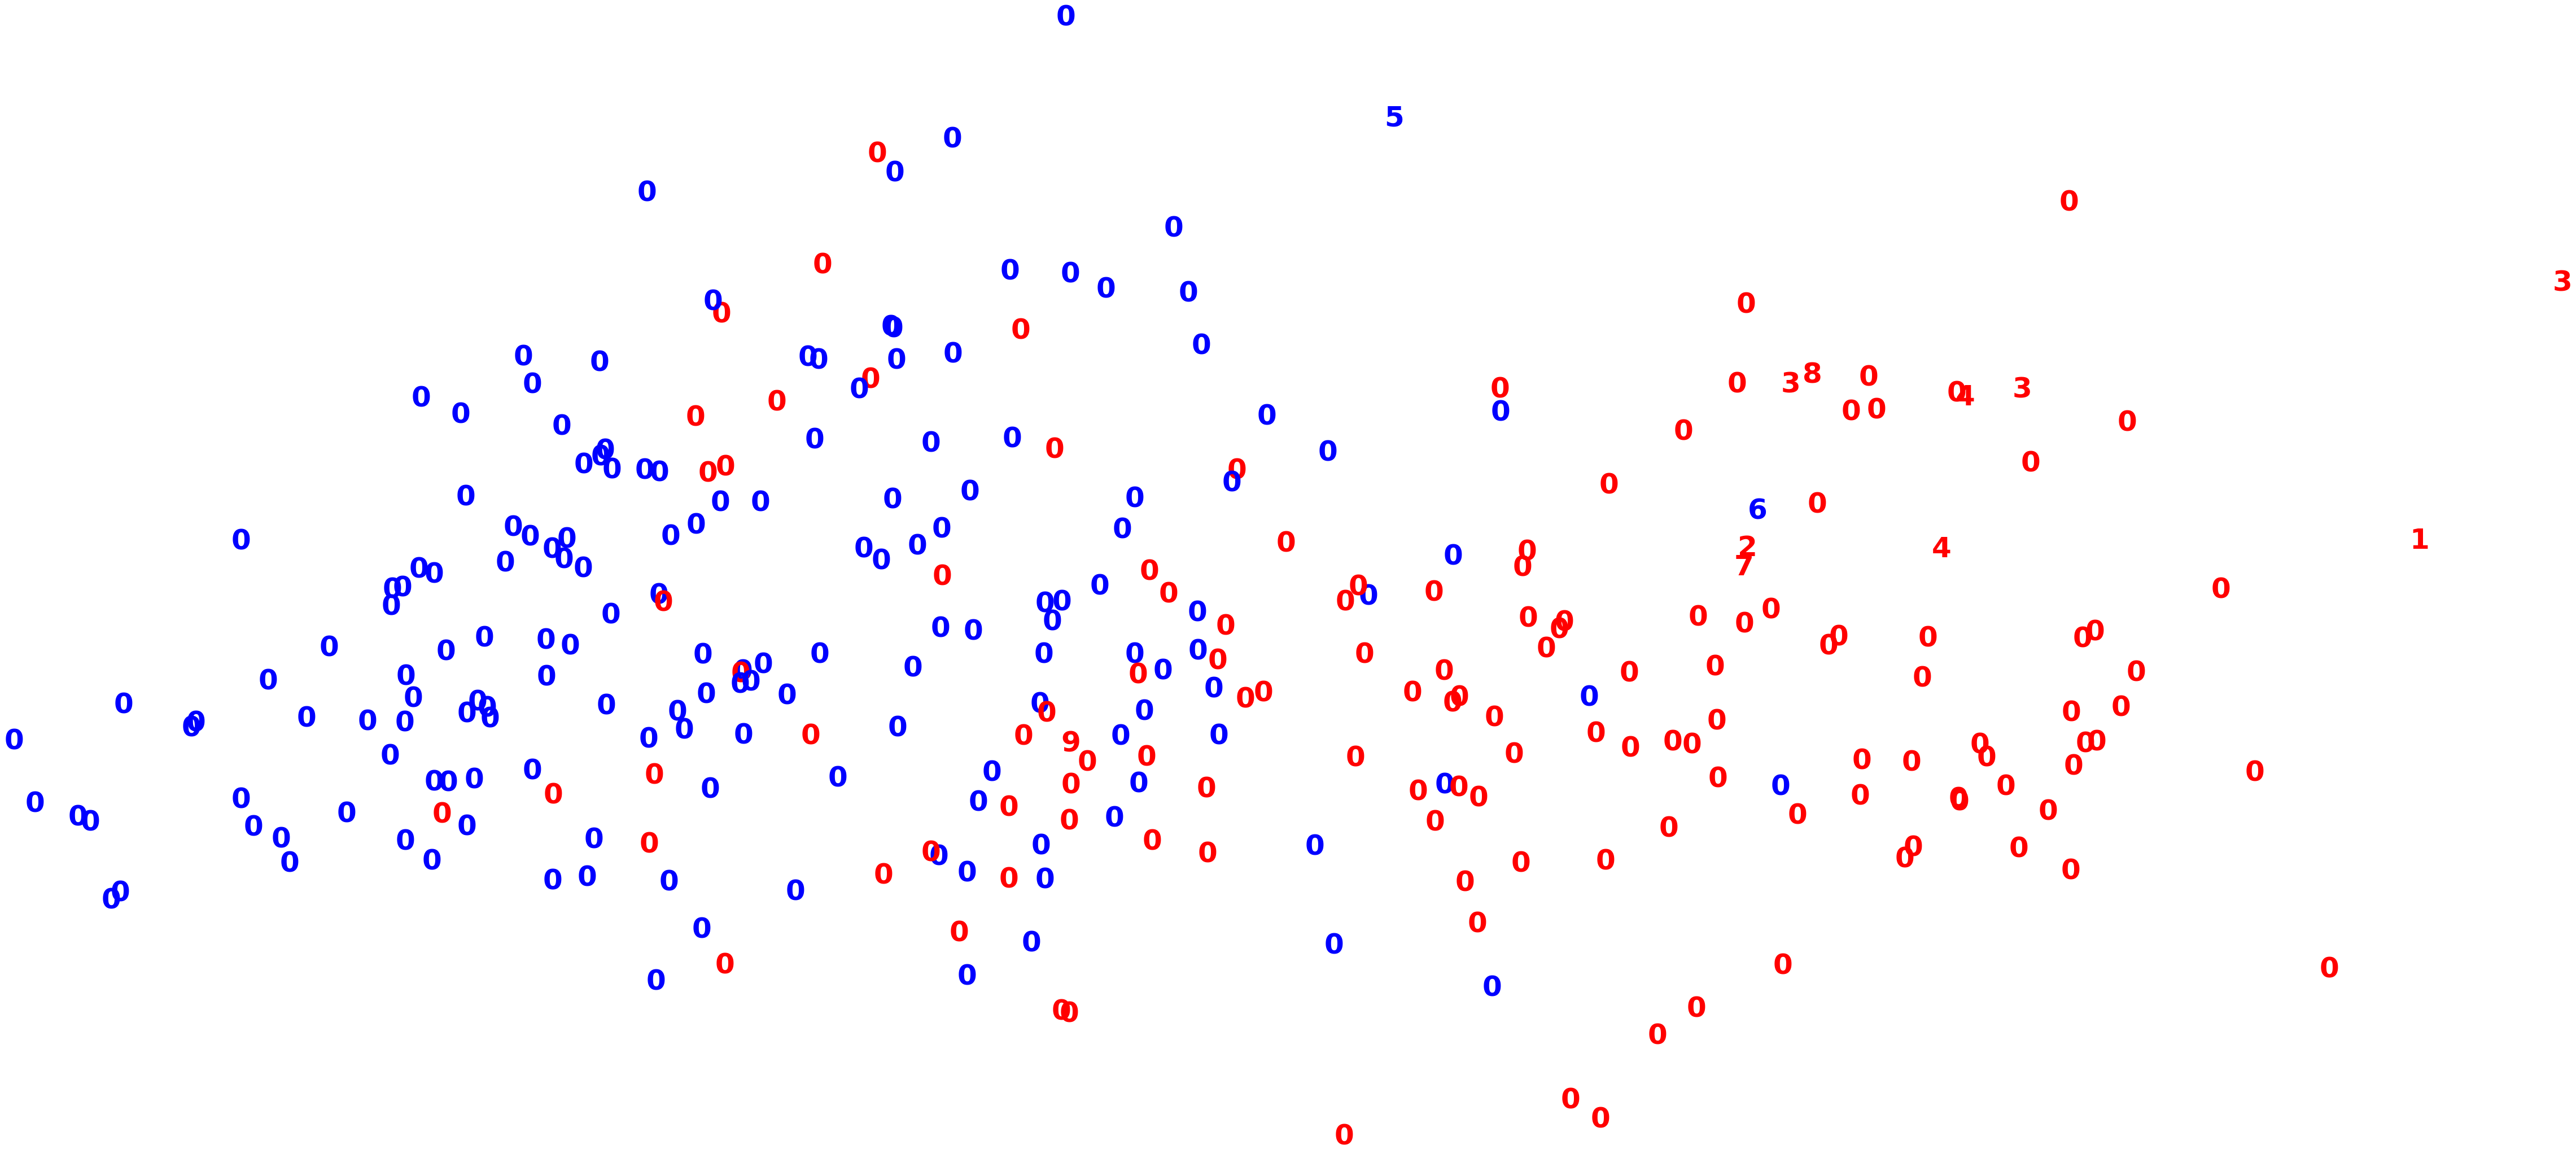

3.75


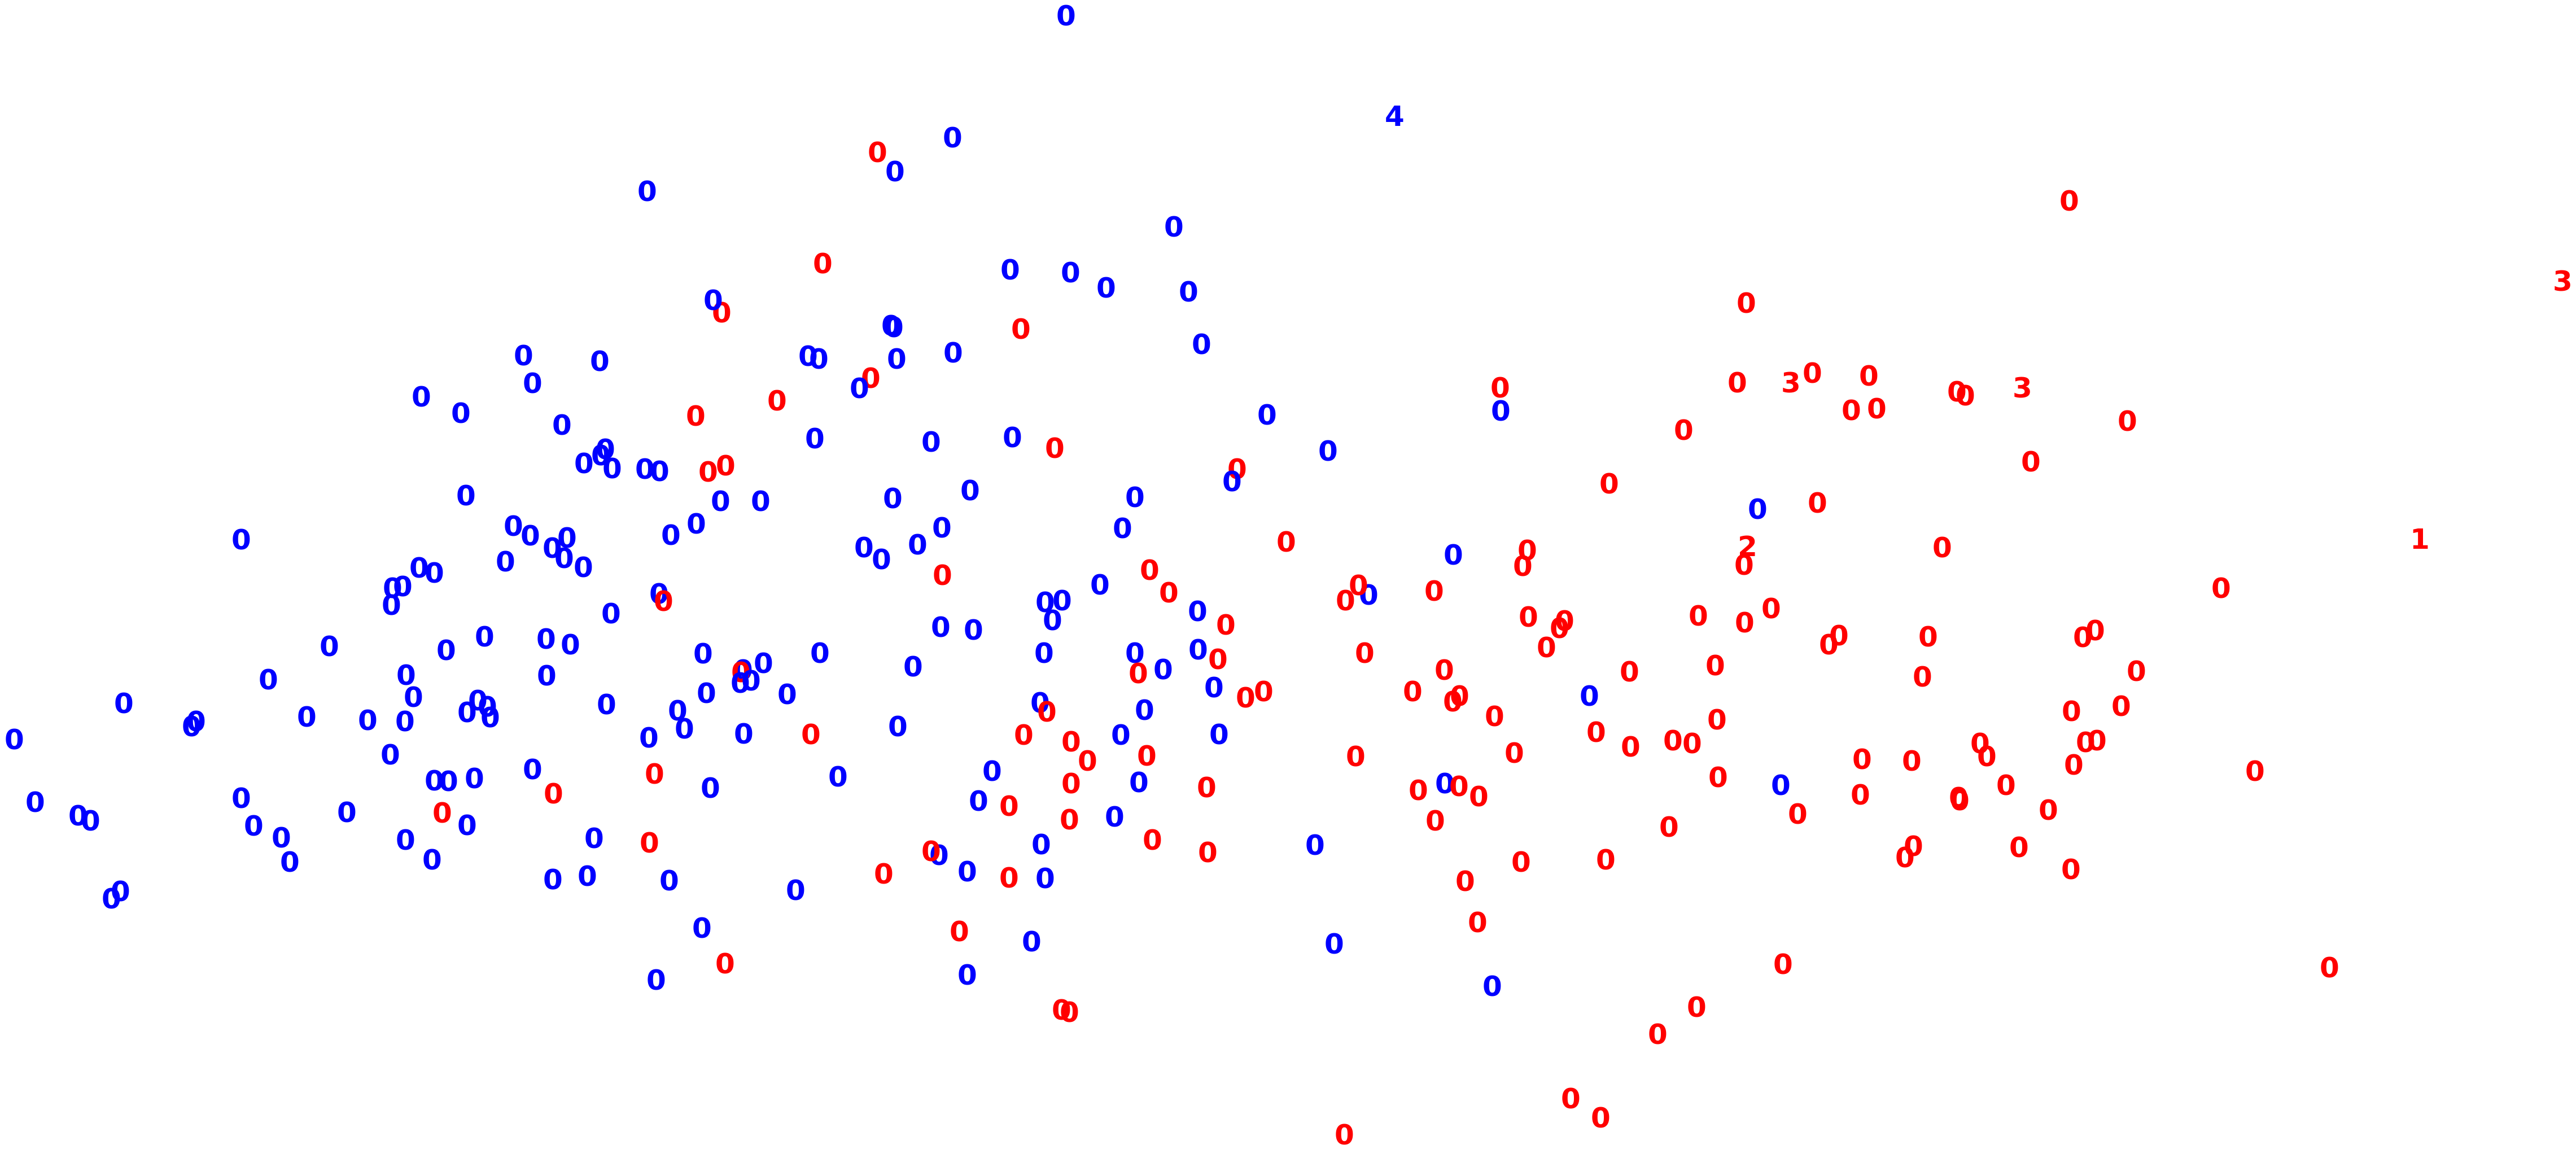

4.0


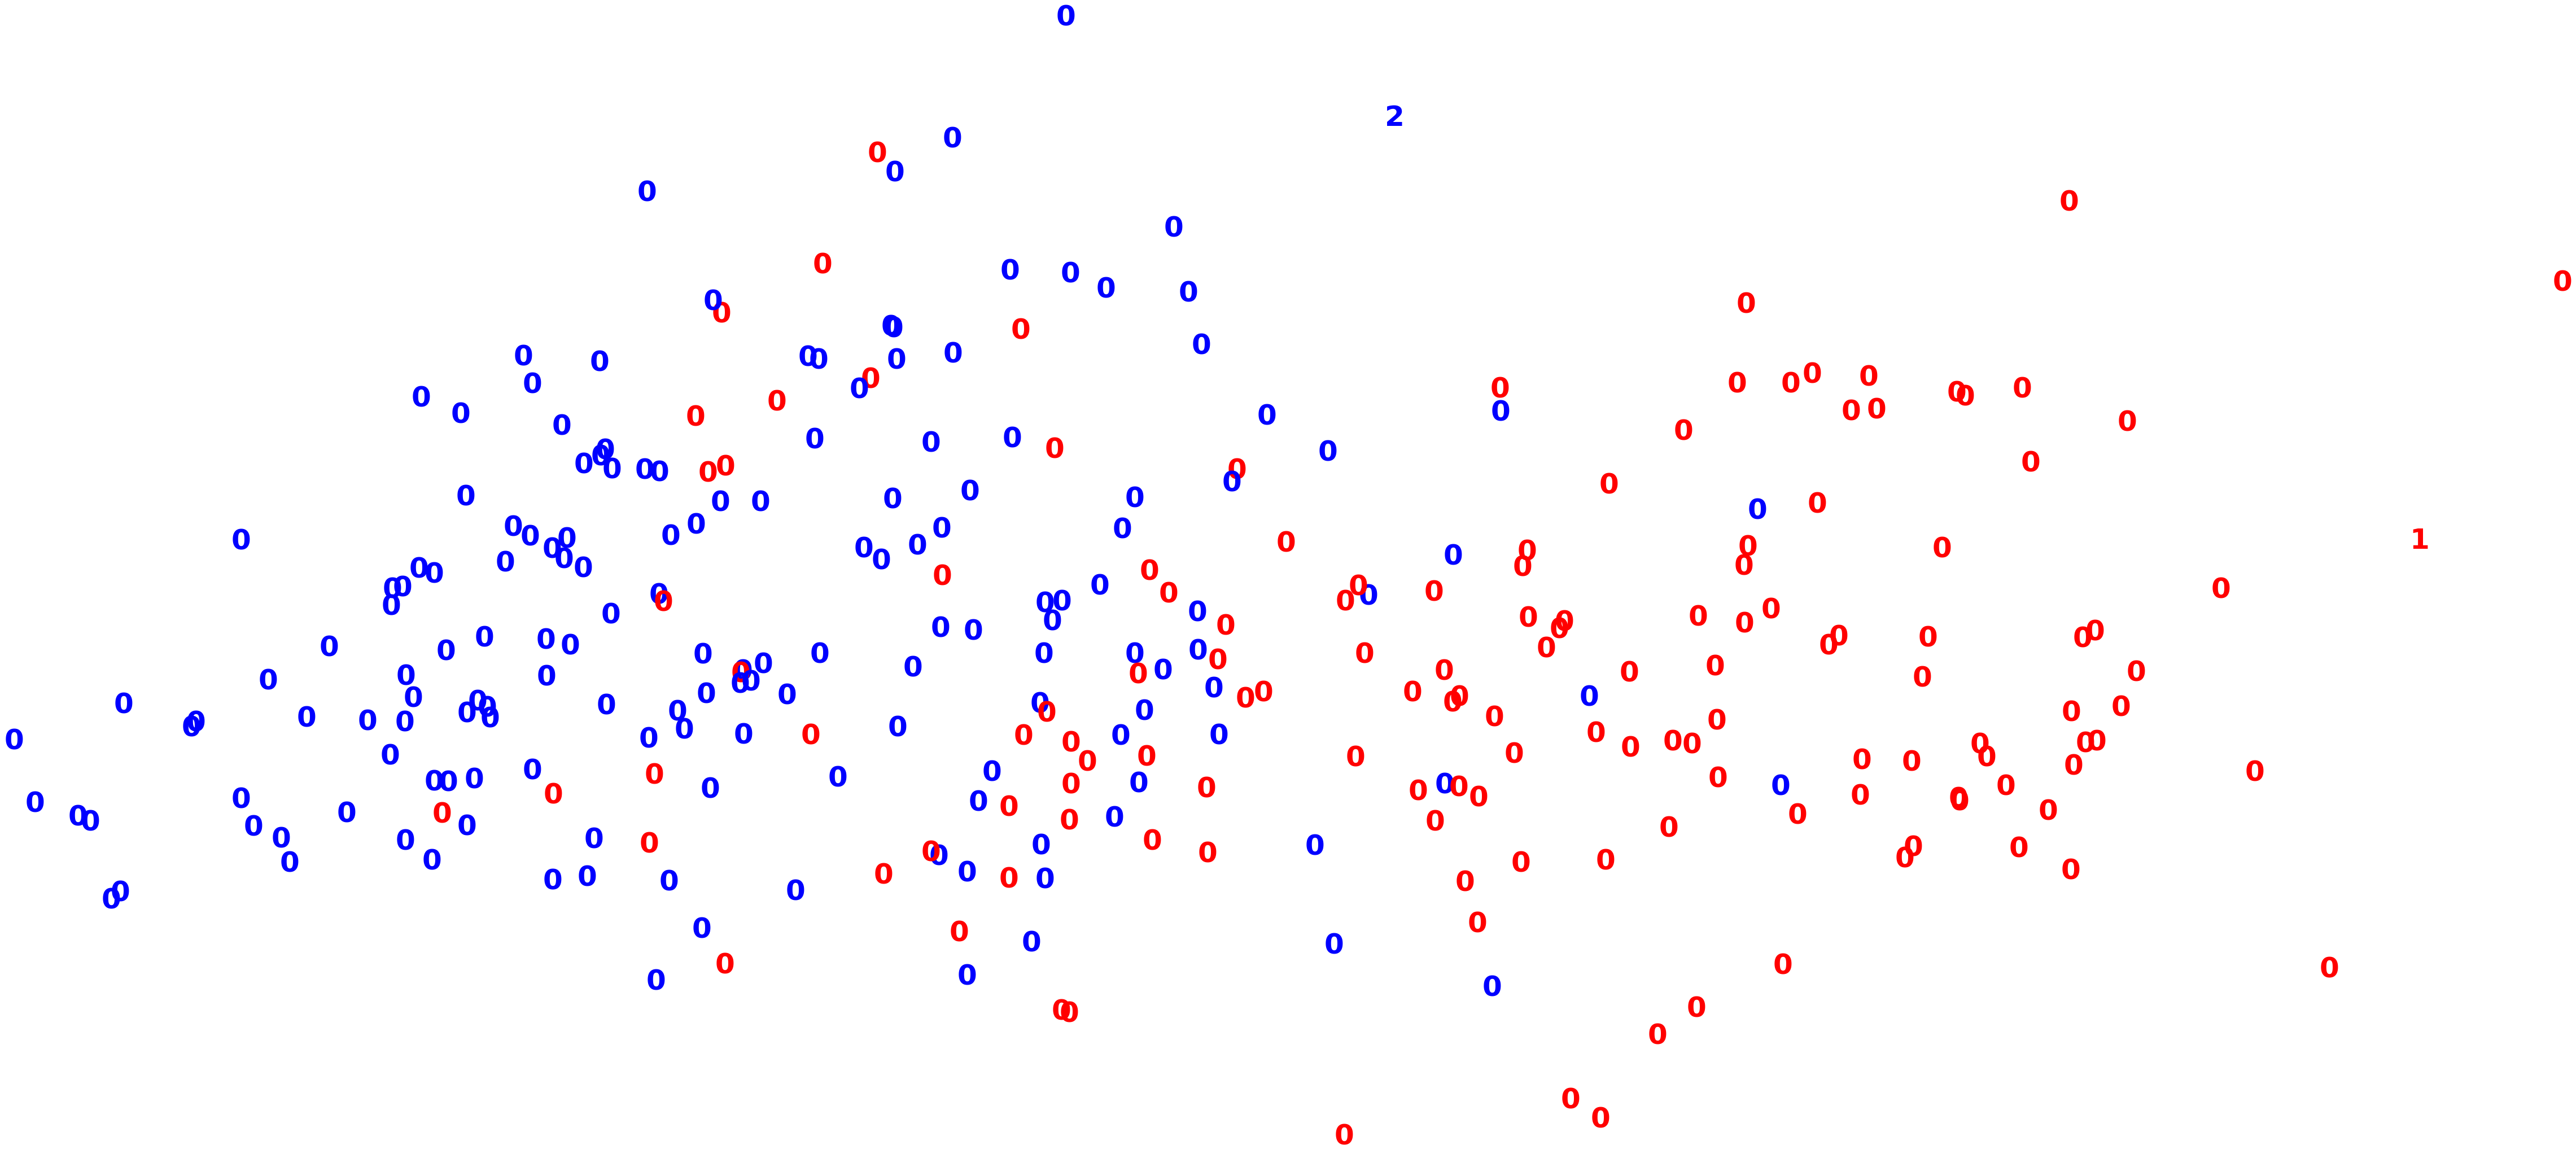

4.25


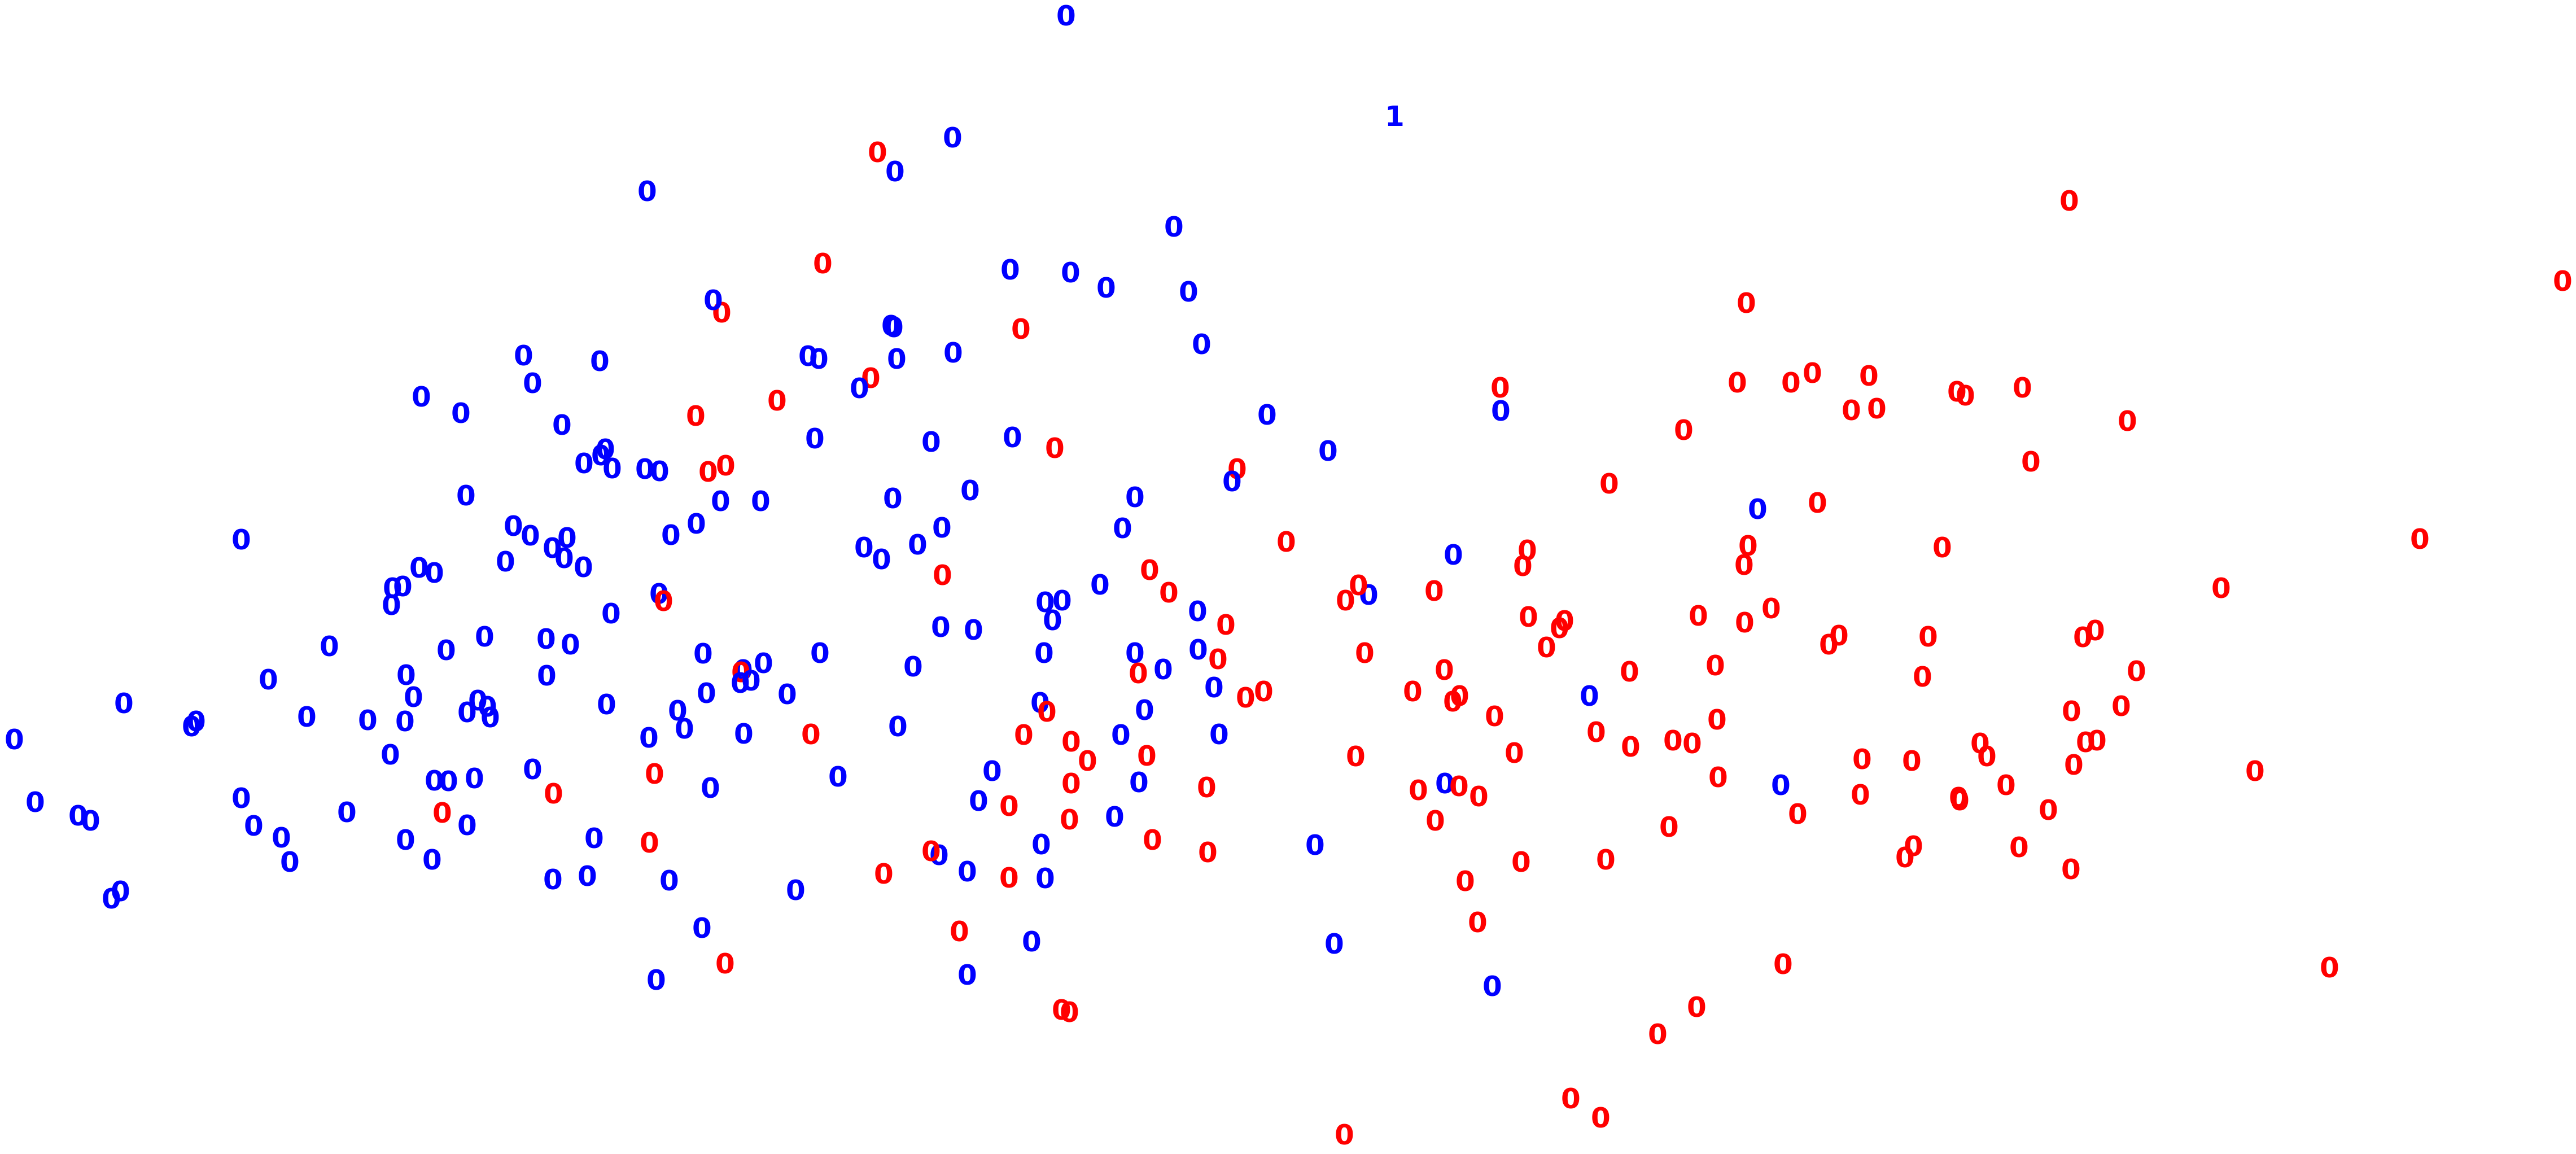

<IPython.core.display.Javascript object>

In [52]:
for j in 0.25 * np.arange(1, 10) + 2:
    # Defining the agglomerative clustering
    dbscan_cluster = DBSCAN(eps=j, min_samples=1, metric="euclidean")
    print(j)
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)

    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10, 5))
    colours = "rbg"
    for i in range(pca.shape[0]):
        plt.text(
            pca[i, 0],
            pca[i, 1],
            str(clusters[i]),
            color=colours[y[i]],
            fontdict={"weight": "bold", "size": 50},
        )

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show()

When epsilon is low, each cluster is a point. When epsilon is large, the whole sample of points become a single cluster (besides a few outliers).  The transition happens about about epsilon of 3.  There is no value of epsilon that separates the two groups.